In [647]:
### Code
# import data
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import pandas as pd
import matplotlib
import matplotlib.pylab as pylab
from mpl_toolkits.basemap import Basemap
pylab.rcParams['figure.figsize'] = 16, 12
pd.options.display.mpl_style = 'default'
get_ipython().magic(u'matplotlib inline')
import ibuttonplots
import importibuttondata
%matplotlib inline

files = glob.glob('./data/*[tT].csv')
meta0 = pd.DataFrame(pd.read_csv('./data/bmoremetadata.csv', sep = ','))
tempDF0, anomalyDF0, meta0 = importibuttondata.importdata(files, meta0)

#files = glob.glob('./data/*[tT].csv')
files = glob.glob('./data/falldownload/*[tT].csv')
meta1 = pd.DataFrame(pd.read_csv('./data/falldownload/TempSensorFinal_results-4.csv', sep = ','))
#meta0 = pd.DataFrame(pd.read_csv('./data/bmoremetadata.csv', sep = ','))
tempDF1, anomalyDF1, meta1 = importibuttondata.importdata(files, meta1)

frames = [tempDF0, tempDF1]
tempDF = pd.concat(frames).resample('H')
anomalyDF = pd.concat([anomalyDF0, anomalyDF1])
meta = pd.concat([meta0, meta1.loc()[np.setdiff1d(meta1.sensornumber, meta0.sensornumber)]])

# Import Science Center observation data
date_spec = {'Date': [2, 3]}
urbandf = pd.read_csv('./data/observations/urban/2138216847366dat.csv', 
                      sep = ',', 
                      parse_dates = {'Date':[2, 3]},
                      #parse_dates = ['YYYYMMDD', 'HHM'],
                      keep_date_col=True).set_index('Date')
#urbandf.Temp[urbandf.Temp == '****'] = 'NaN' # replace stars with nans
urbandf.Temp = (urbandf.Temp.astype('float')) #-32)*5/9. #change the data to float
urbandf.Temp[urbandf.Temp > 400] = 'NaN' #change unrealistic temp data to nan, data in F so 400 too high
urbandf = urbandf[~((urbandf.index.month == 2) & (urbandf.index.day == 29))] # get rid of leap years
#df.DEWP[df.DEWP == '****'] = 'NaN' # replace stars with nans
#df.DEWP = df.DEWP.astype('float') #change the data to float
urbandf = urbandf.resample('H')
urbandf.rename(columns = {'Temp' : 'TEMP'}, inplace = True)
urbandf.index = urbandf.index - pd.DateOffset(hours  = 4)

# Import hourly BWI data
date_spec = {'Date': [2]}
df = pd.read_csv('./data/observations/rural/4330976847362dat.csv', sep = ',', parse_dates = date_spec, keep_date_col=True).set_index('Date')
df.TEMP[df.TEMP == '****'] = 'NaN' # replace stars with nans
df.TEMP = (df.TEMP.astype('float')-32)*5/9. #change the data to float
df.TEMP[df.TEMP > 400] = 'NaN' #change unrealistic temp data to nan, data in F so 400 too high
df = df[~((df.index.month == 2) & (df.index.day == 29))] # get rid of leap years

df.DEWP[df.DEWP == '****'] = 'NaN' # replace stars with nans
df.DEWP = df.DEWP.astype('float') #change the data to float
ruraldf = df.resample('H')

import sqlite3
conn = sqlite3.connect('amazinggrace-weewx.sdb')
amazinggracedf = pd.read_sql_query('SELECT * from archive', conn)
amazinggracedf['dateTime']=pd.to_datetime(amazinggracedf['dateTime'], unit='s')
amazinggracedf.outTemp = (amazinggracedf.outTemp-32)*5./9.
amazinggracedf = amazinggracedf.set_index('dateTime')
amazinggracedf.index = amazinggracedf.index - pd.DateOffset(hours  = 5)

conn = sqlite3.connect('olinhall-weewx.sdb')
olinhalldf = pd.read_sql_query('SELECT * from archive', conn)
olinhalldf['dateTime']=pd.to_datetime(olinhalldf['dateTime'], unit='s')
olinhalldf.outTemp = (olinhalldf.outTemp-32)*5./9.
olinhalldf = olinhalldf.set_index('dateTime')
olinhalldf.index = olinhalldf.index - pd.DateOffset(hours  = 5)

#amazinggracedf.outTemp.plot(label = 'Amazing Grace')
#plt.hold(True)
#olinhalldf.outTemp.plot(label = 'Olin Hall')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol = 1)

amazinggracedf = amazinggracedf[amazinggracedf.index.minute ==0]#amazinggracedf.resample('H')
olinhalldf = olinhalldf[olinhalldf.index.minute ==0]

ebaltsensorsi = np.where(meta['location:Longitude']>= -76.6125831)#-76.61)# -76.6072591 )

ebaltsensorsi = np.where(meta['location:Latitude']<= 39.32374)
parksi = np.where((meta['landcoverclass'] != 'impervious') & (meta['location:Longitude']>= -76.6125831)) # -76.61) )
#plt.scatter(meta['location:Longitude'].iloc[ebaltsensorsi],
#            meta['location:Latitude'].iloc[ebaltsensorsi], s = 100)
#plt.scatter(meta['location:Longitude'].iloc[parksi],
#            meta['location:Latitude'].iloc[parksi], color = 'g')

parksensors = meta.sensornumber.iloc[parksi]
ebaltsensors = meta.sensornumber.iloc[ebaltsensorsi]
nonparks = np.setdiff1d(ebaltsensors, parksensors)

selected = ebaltsensors

startdate = '2015-07-1' 
enddate = '2015-09-10'
matplotlib.rcParams.update({'font.size': 16})

/Users/annascott2/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/annascott2/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/annascott2/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [728]:
# quality control 

files = glob.glob('./data/*[tThH].csv')
for file in files: 
    s1 = open(file, 'r').readlines()[1].replace('\n', '').replace('\r', '')
    try: 
        s2 = open('./data/falldownload/'+os.path.basename(file), 'r').readlines()[1].replace('\n', '').replace('\r', '')
        if s1 != s2 : 
            print os.path.basename(file) 
    except IOError: 
        print 'file not exist'

file not exist
file not exist
file not exist
file not exist
file not exist
file not exist
file not exist
file not exist
file not exist
file not exist
file not exist
file not exist
file not exist
86t.csv
file not exist
file not exist


In [732]:
# quality control : find who matches 86t.csv
s1 = open('./data/86t.csv', 'r').readlines()[1].replace('\n', '').replace('\r', '')
files = glob.glob('./data/*[tThH].csv')
for file in files: 
    try: 
        s2 = open('./data/falldownload/'+os.path.basename(file), 'r').readlines()[1].replace('\n', '').replace('\r', '')
        #s2 = open(file, 'r').readlines()[1].replace('\n', '').replace('\r', '')
        if s1 == s2 : 
            print os.path.basename(file) 
    except IOError: 
        print 'file not exist'

file not exist
file not exist
file not exist
file not exist
file not exist
file not exist
file not exist
file not exist
file not exist
file not exist
file not exist
file not exist
file not exist
file not exist
file not exist


In [627]:
# import rooftest data 
files = glob.glob('./data/rooftest/*[tT].csv')
meta0 = pd.DataFrame(pd.read_csv('./data/rooftest/TempSensor1_results.csv', sep = ','))
rooftempDF, roofanomalyDF, roofmeta = importibuttondata.importdata(files, meta0)
rooftempDF = rooftempDF['2015-05-13':]

date_spec = {'Date': [2, 3]}
roofobsDF = pd.DataFrame(pd.read_csv('./data/rooftest/olinstationdatamay2015.csv', 
                        sep = ';', 
                        parse_dates = {'DateTime':[0,1]},
                          keep_date_col=True, 
                        )).set_index('DateTime')
roofobsDF.index = roofobsDF.index + pd.DateOffset(hours  = 14) # -10

if ~hasattr(roofobsDF, 'TEMP'):
    roofobsDF = roofobsDF.rename(columns={'inTemp':'TEMP'})
#roofobsDF
#roofobsDF.TEMP.groupby(roofobsDF.index.hour).mean().plot()

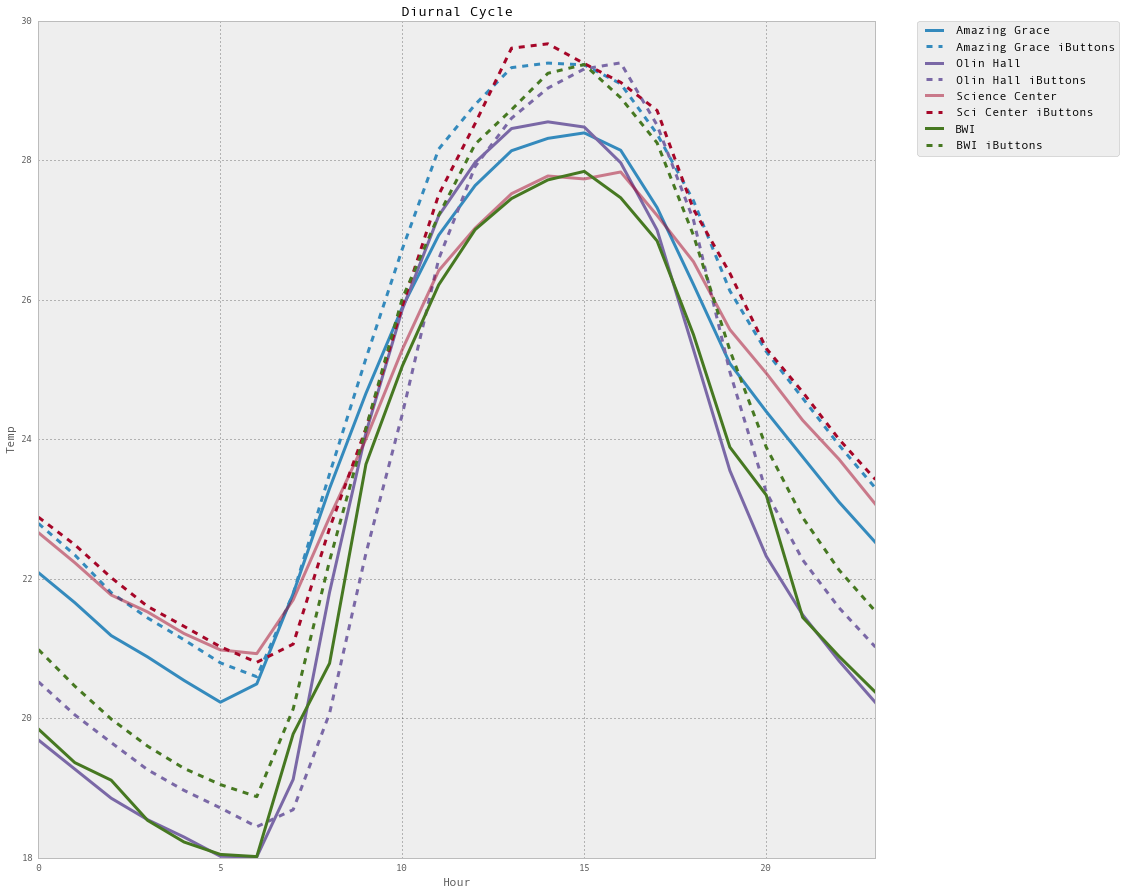

In [89]:
# all stations
fig = plt.figure(figsize=[15,15])
# Amazing Grace
start = '2015-08-07'
end = '2015-9-27'
amazinggracedf[start:end].outTemp.groupby(amazinggracedf[start:end].index.hour).mean().plot(
    label = 'Amazing Grace', 
    linewidth = 3, 
    color = pd.tools.plotting._get_standard_colors(4)[0]
    )
buttons = [2, 69] # Amazing Grace
tempDF[start:end][buttons].mean(axis=1).groupby(tempDF[start:end].index.hour).mean().plot(
    #yerr = ruraldf['2015-06-25':'2015-08-09'].TEMP.groupby(ruraldf['2015-06-25':'2015-08-09'].index.hour).std(),
    label = 'Amazing Grace iButtons',
    style = '--',`
    color = pd.tools.plotting._get_standard_colors(4)[0],
    linewidth = 3)

# Olin Hall
olinhalldf[start:end].outTemp.groupby(olinhalldf[start:end].index.hour).mean().plot(
    label = 'Olin Hall', 
    color = pd.tools.plotting._get_standard_colors(4)[1], 
    linewidth = 3
    )
buttons = [90, 49, 107, 86, 42, 53, 35, 96, 20] # Olin Hall
tempDF[start:end][buttons].mean(axis=1).groupby(tempDF[start:end].index.hour).mean().plot(
    #yerr = ruraldf['2015-06-25':'2015-08-09'].TEMP.groupby(ruraldf['2015-06-25':'2015-08-09'].index.hour).std(),
    label = 'Olin Hall iButtons',
    style = '--',
    color = pd.tools.plotting._get_standard_colors(4)[1], 
    linewidth = 3)

# Science Center
urbandf[start:end].TEMP.groupby(urbandf[start:end].index.hour).mean().plot(
    label = 'Science Center', 
    #yerr = urbandf['2015-06-25':'2015-08-09'].TEMP.groupby(urbandf['2015-06-25':'2015-08-09'].index.hour).std(),
    linewidth = 3,
    color = pd.tools.plotting._get_standard_colors(4)[2],  
    alpha = .5)
buttons = [108] #Science Center
tempDF[start:end][buttons].mean(axis=1).groupby(tempDF[start:end].index.hour).mean().plot(
    #yerr = ruraldf['2015-06-25':'2015-08-09'].TEMP.groupby(ruraldf['2015-06-25':'2015-08-09'].index.hour).std(),
    label = 'Sci Center iButtons',
    style = '--',
    linewidth = 3,
    color = pd.tools.plotting._get_standard_colors(4)[2])

# BWI
ruraldf[start:end].TEMP.groupby(ruraldf[start:end].index.hour).mean().plot(
    #yerr = ruraldf['2015-06-25':'2015-08-09'].TEMP.groupby(ruraldf['2015-06-25':'2015-08-09'].index.hour).std(),
    label = 'BWI',
    #alpha = .5, 
    linewidth = 3,
    color = pd.tools.plotting._get_standard_colors(4)[3])
buttons = [131, 133, 134, 135] #bwi
tempDF[start:end][buttons].mean(axis=1).groupby(tempDF[start:end].index.hour).mean().plot(
    #yerr = ruraldf['2015-06-25':'2015-08-09'].TEMP.groupby(ruraldf['2015-06-25':'2015-08-09'].index.hour).std(),
    label = 'BWI iButtons',
    style = '--',
    linewidth = 3,
    color = pd.tools.plotting._get_standard_colors(4)[3])

lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol = 1)
plt.xlabel('Hour')
plt.ylabel('Temp')
plt.title('Diurnal Cycle')

In [649]:
if ~hasattr(olinhalldf, 'TEMP'):
    olinhalldf = olinhalldf.rename(columns={'outTemp':'TEMP'})
    
if ~hasattr(amazinggracedf, 'TEMP'): 
    amazinggracedf = amazinggracedf.rename(columns={'outTemp':'TEMP'})   

In [665]:
#startdate = '2015-07-1' 
#enddate = '2015-09-10'

def errorplot(buttons, obsDF, name = '$W_x$ Station',  startdate = '2015-07-01', enddate = '2015-09-10', buttonDF = tempDF) : 
# function that takes button numbers and weather station dataframe and compares the buttons to the weather station
    nameList = map(str, buttons) + [name]
    fig0 = plt.figure(figsize = [32,16])
    # plot time series of temperature
    plt.subplot(3,1,1)
    plt.plot(buttonDF[startdate:enddate].resample('D').index, buttonDF[startdate:enddate][buttons].resample('D', how = 'min'))
    plt.plot(obsDF[startdate:enddate].resample('D').index, obsDF[startdate:enddate].TEMP.resample('D', how = 'min'), '--')
    plt.legend(nameList)
    plt.title('Minimum Daily Temperature near %s'%name)
    
    # plot time series of T_min error
    plt.subplot(3,1,2)
    plt.plot(buttonDF[startdate:enddate].resample('D', how = 'min').index, 
             (buttonDF[startdate:enddate][buttons].resample('D', how = 'min')-np.tile(ruraldf[startdate:enddate].TEMP.resample('D', how = 'min'), [buttonDF[startdate:enddate][buttons].resample('D', how = 'min').shape[1],1]).T),
             )
    plt.legend(nameList)
    plt.title('Error, $T_{min}$')
    
    # plot time series of T_max error 
    plt.subplot(3,1,3)
    plt.plot(buttonDF[startdate:enddate].resample('D', how = 'max').index, 
             (buttonDF[startdate:enddate][buttons].resample('D', how = 'max')-np.tile(ruraldf[startdate:enddate].TEMP.resample('D', how = 'max'), [buttonDF[startdate:enddate][buttons].resample('D', how = 'max').shape[1],1]).T),
             )
    plt.legend(nameList) #map(str, buttons)
    plt.title('Error, $T_{max}$')
        
    # plot boxplot of error for all data
    fig1 = plt.figure(figsize=[32,8])
    plt.subplot(1,4,1)
    axHandle = (buttonDF[startdate:enddate][buttons]-np.tile(obsDF[startdate:enddate].TEMP, [buttonDF[startdate:enddate][buttons].shape[1],1]).T).boxplot(return_type='axes')
    plt.title('Error, Hourly T')
    plt.ylim([-6,6])
    plt.ylabel('error, $^{\circ}$ C')
    plt.xlabel('iButton #')
    #plot boxplot of error  for T_min
    plt.subplot(1,4,2)
    axHandle = (buttonDF[startdate:enddate][buttons].resample('D', how = 'min')-np.tile(obsDF[startdate:enddate].TEMP.resample('D', how = 'min'), [buttonDF[startdate:enddate][buttons].resample('D', how = 'min').shape[1],1]).T).boxplot(return_type='axes')
    plt.title('Error, $T_{min}$')
    plt.ylim([-6,6])
    plt.ylabel('error, $^{\circ}$ C')
    plt.xlabel('iButton #')
    #plot boxplot for T_max
    plt.subplot(1,4,3)
    axHandle = (buttonDF[startdate:enddate][buttons].resample('D', how = 'max')-np.tile(obsDF[startdate:enddate].TEMP.resample('D', how = 'max'), [buttonDF[startdate:enddate][buttons].resample('D', how = 'max').shape[1],1]).T).boxplot(return_type='axes')
    plt.title('Error, $T_{max}$')
    plt.ylim([-6,6])
    plt.ylabel('error, $^{\circ}$ C')
    plt.xlabel('iButton #')
    
    # Diurnal cycle
    plt.subplot(1,4,4)
    #plt.errorbar(np.arange(0,24), 
    #             tempDF[startdate:enddate].groupby(tempDF[startdate:enddate].index.hour)[buttons].mean(),
    #             #yerr = tempDF[startdate:enddate].groupby(tempDF[startdate:enddate].index.hour)[buttons].mean().std(axis=1),
    #             label = buttons)
    #plt.errorbar(np.arange(0,24), 
    #             df[startdate:enddate].TEMP.groupby(df[startdate:enddate].index.hour).mean(),
    #             yerr = df[startdate:enddate].TEMP.groupby(df[startdate:enddate].index.hour).mean().std(),
    #             label = 'W')
    #plt.legend()
    #plt.xlim([0,23])
    plt.plot(buttonDF[startdate:enddate].groupby(buttonDF[startdate:enddate].index.hour)[buttons].mean())
    plt.plot(obsDF[startdate:enddate].TEMP.groupby(obsDF[startdate:enddate].index.hour).mean(), '--')
    plt.xlabel('hour')
    plt.ylabel('Temperature $^{\circ}$C')
    plt.legend(nameList, loc= 'upper left')
    plt.title('Diurnal Cycle')

    # Plot minimum temp versus minimum temp error (for available data)
    fig2 = plt.figure(figsize=[32,8])
    err = (buttonDF[startdate:enddate][buttons].resample('D', how = 'min')-np.tile(obsDF[startdate:enddate].TEMP.resample('D', how = 'min'), [buttonDF[startdate:enddate][buttons].resample('D', how = 'min').shape[1],1]).T).mean(axis=1)
    #err = err[1:] # lag error as a 6 am reading
    n=1
    for variable in ['TEMP', 'windSpeed', 'pressure', 'outHumidity', 'radiation', 'windDir']: 
        plt.subplot(2,4,n)
        
        try: 
            x = obsDF[startdate:enddate][variable].resample('D', how= 'mean')
        
        except IndexError: 
            x = obsDF[startdate:enddate][variable].resample('D', how= 'mean')
        except KeyError : 
                print 'error: cannot map %s'%variable
                x = []
        except DataError : 
            print 'not numeric'
            x = []
        if x.shape == err.shape  : 
            plt.scatter(x[0:-1],err[1:])
            plt.xlabel('Mean %s'%variable)
            plt.ylabel('$Error, T_{min}$')

            #index = ~np.isnan(x[0:-1]) & ~np.isnan(err[1:])
            #p, res, _, _, _ = np.polyfit(x[index],err[index],1, full= True)
            index = ~np.isnan(x.values[0:-1]) & ~np.isnan(err.values[1:])
            p, res, _, _, _ = np.polyfit(x[0:-1][index],err[1:][index],1, full= True)

            m = p[0]
            b= p[1]
            plt.plot(x, m*x+b,color = 'k', # pd.tools.plotting._get_standard_colors(3)[0],
                     lw =2,
                     label = '$\Delta T_{u-r}=%.2f \cdot RH+%.2f$, $r^2 = %2.1f$'%(m,b,res),
                     )
            plt.legend()
                        #    print 'Need numeric data for %s'%variable

        n = n+1
    
    return fig0, fig1, fig2

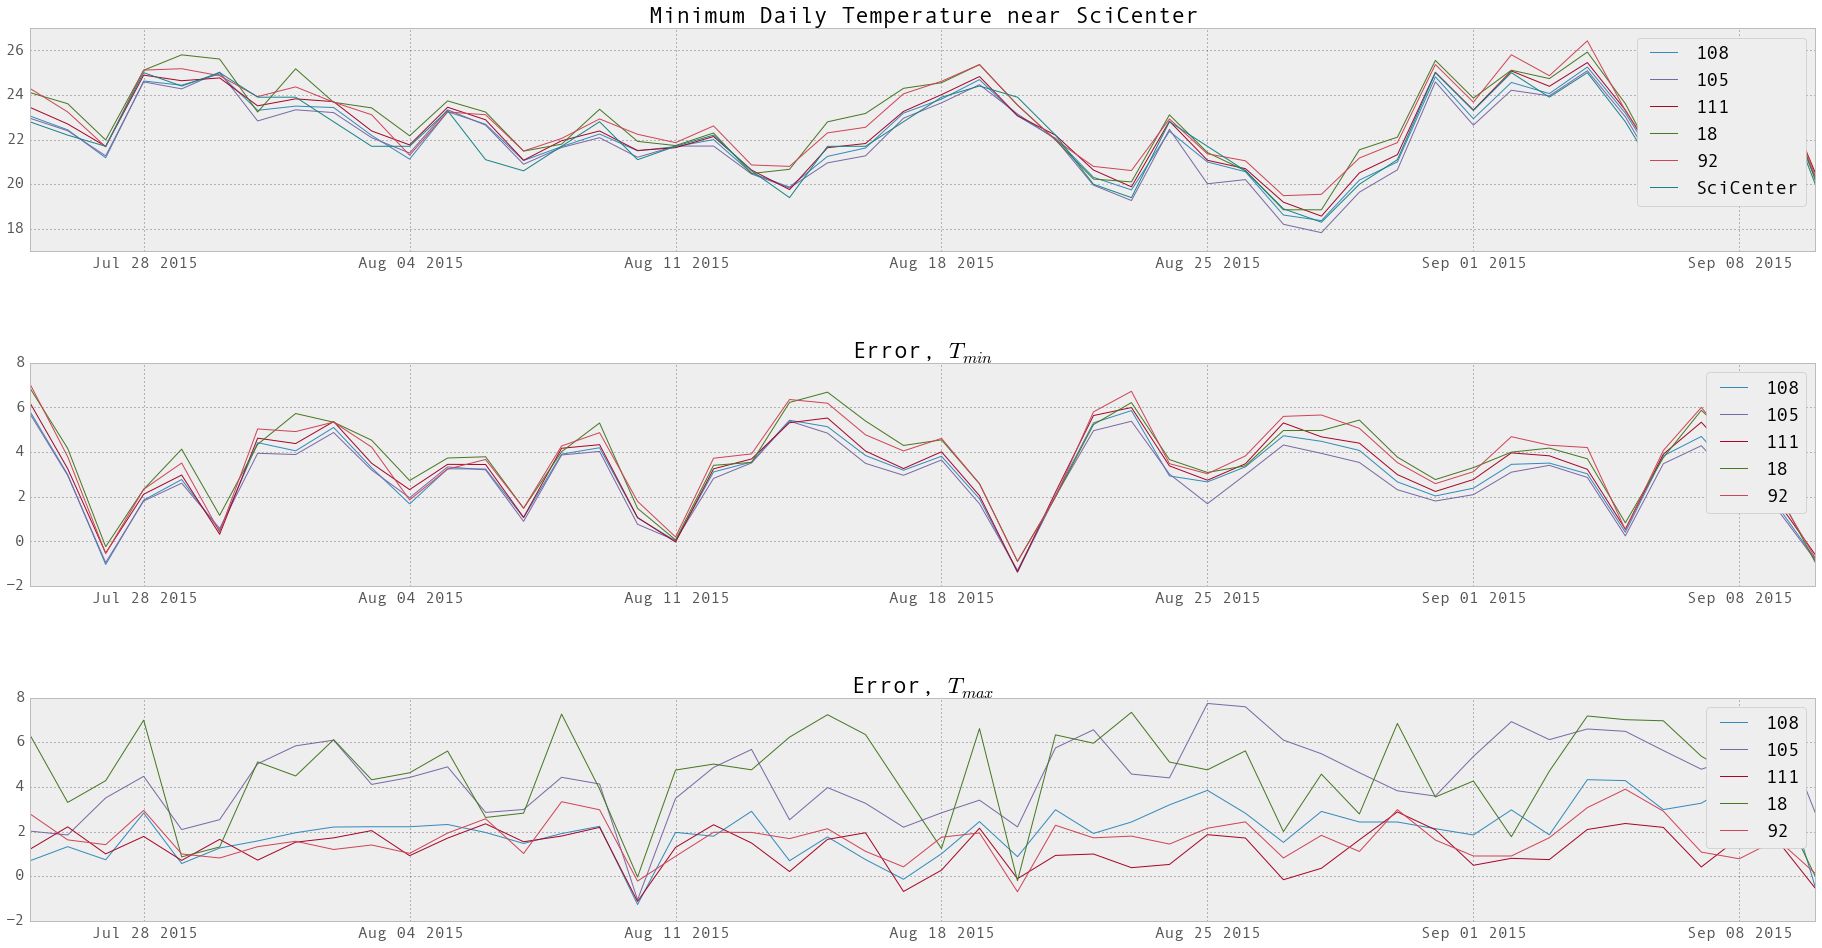

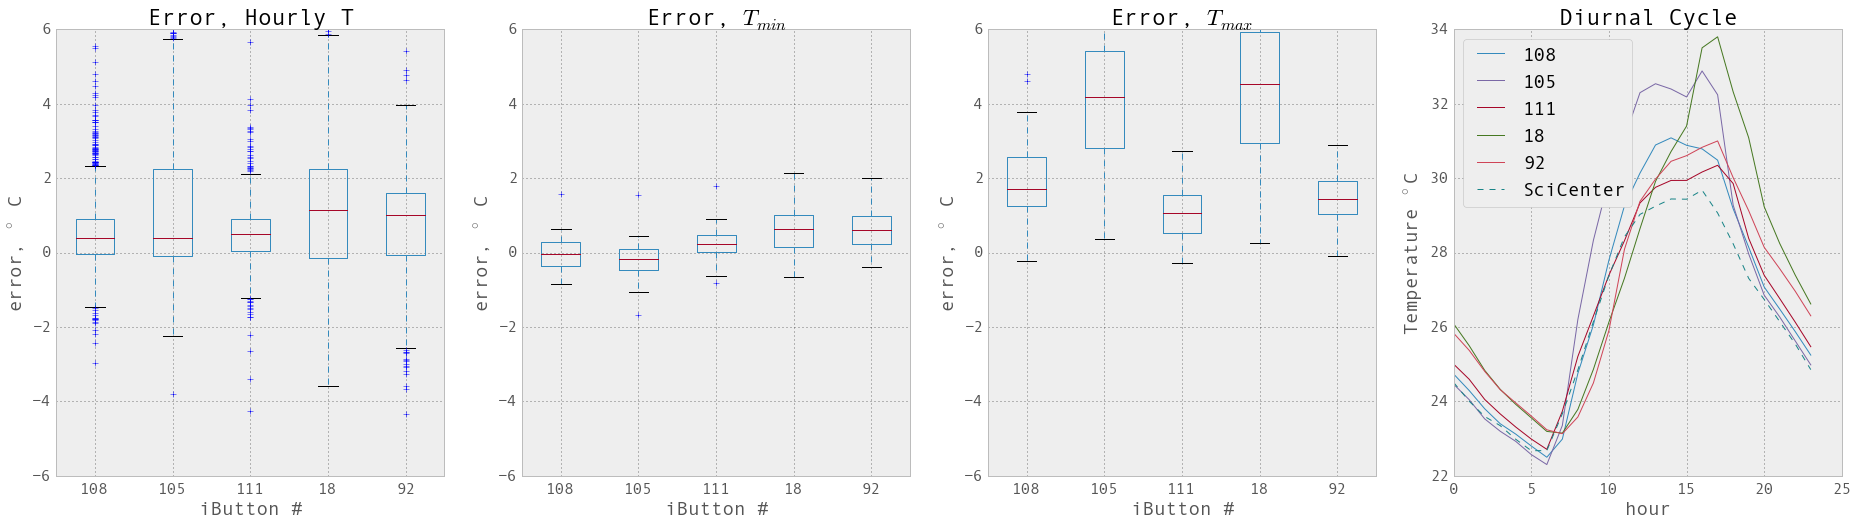

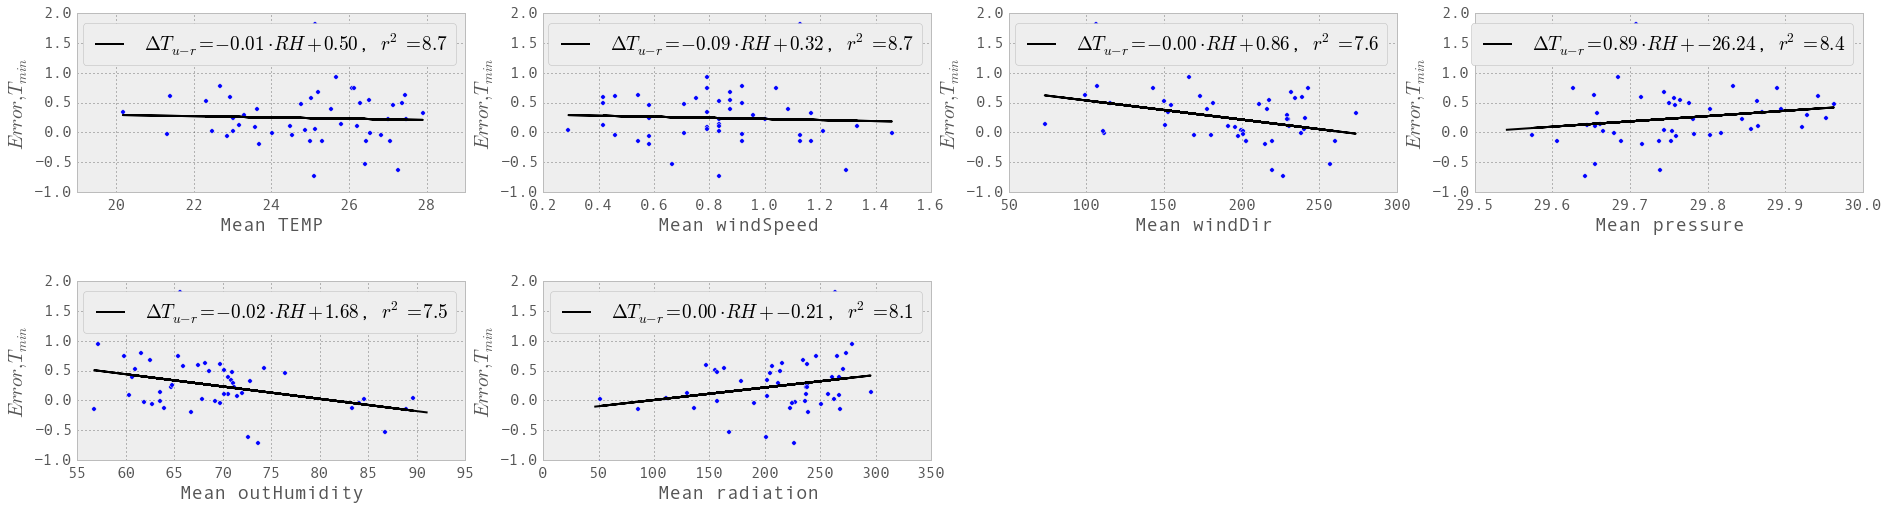

In [443]:
fig0, fig1, fig2 = errorplot([108, 105, 111, 18, 92], urbandf, "SciCenter")

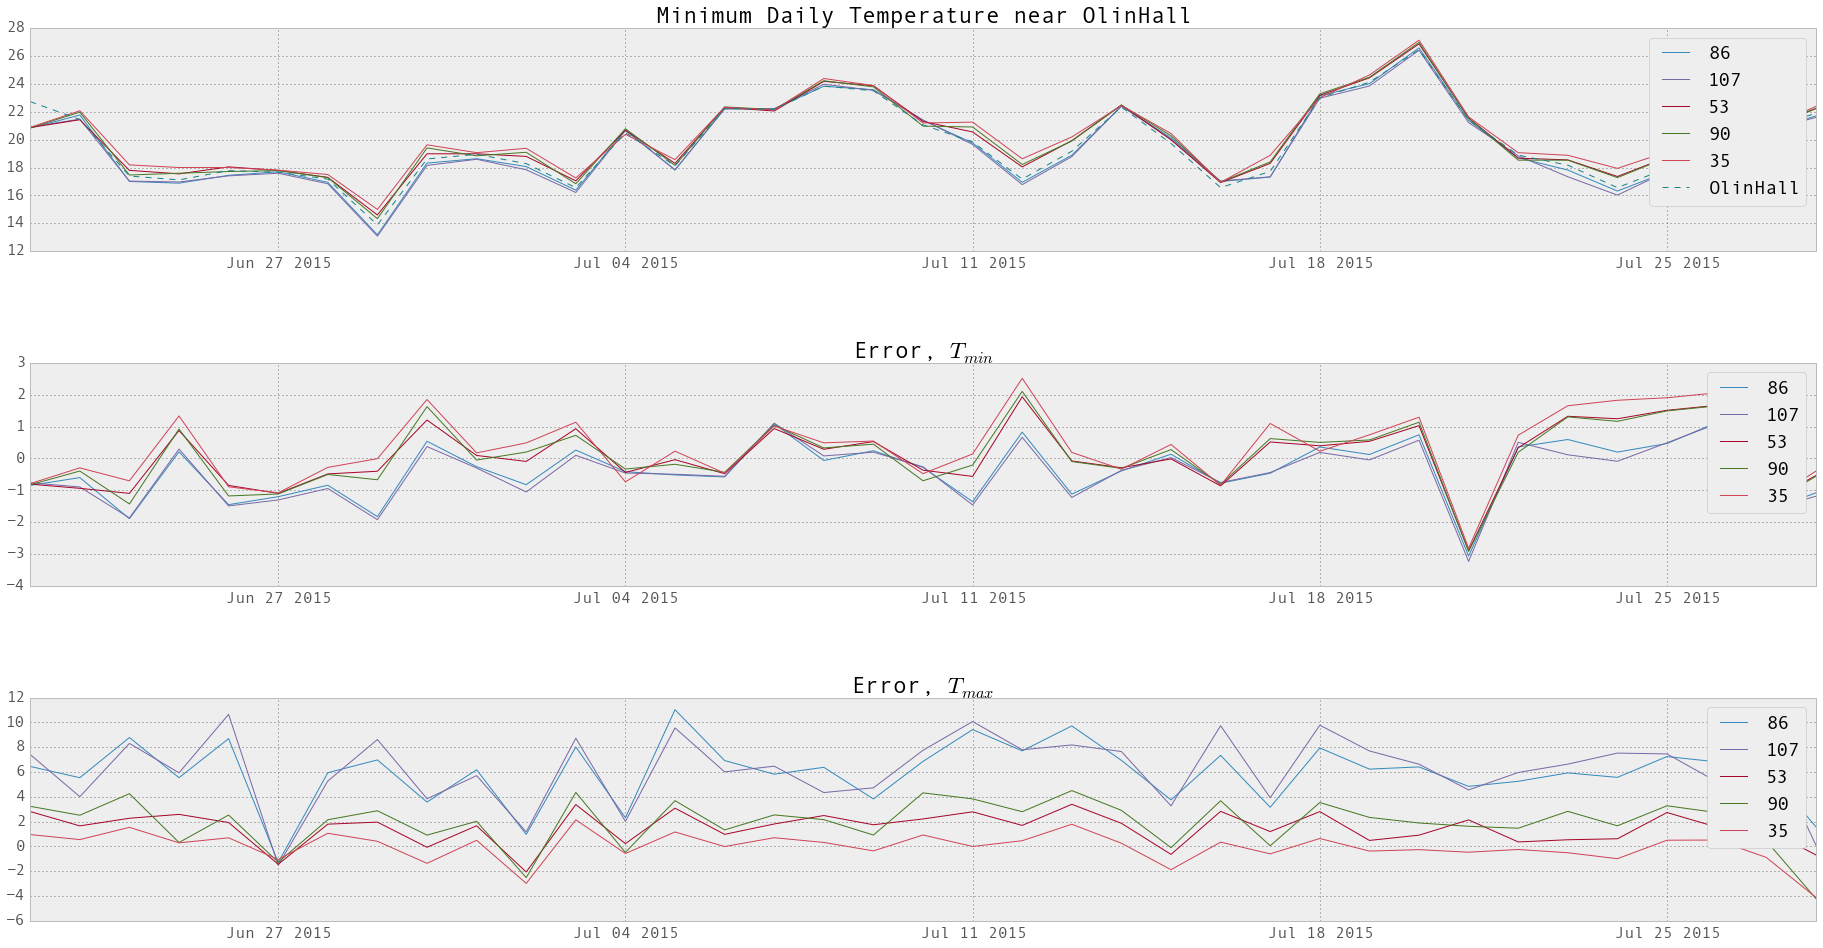

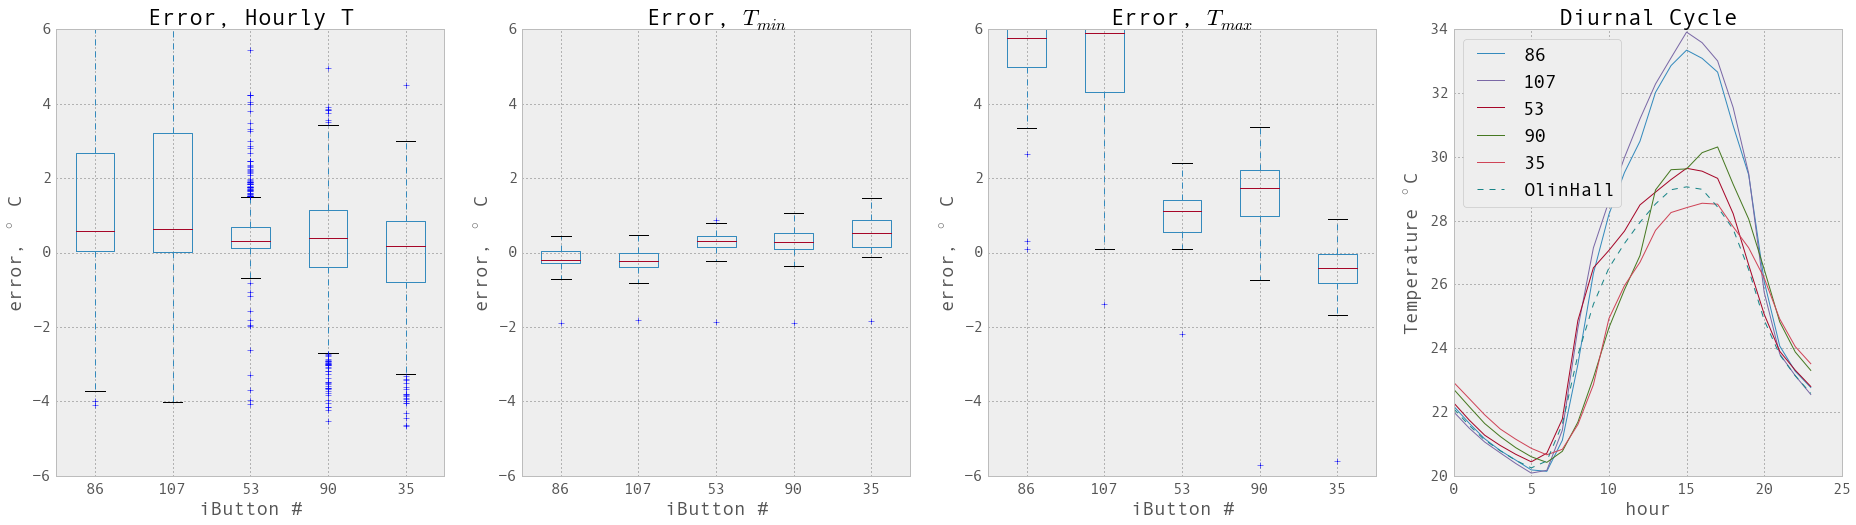

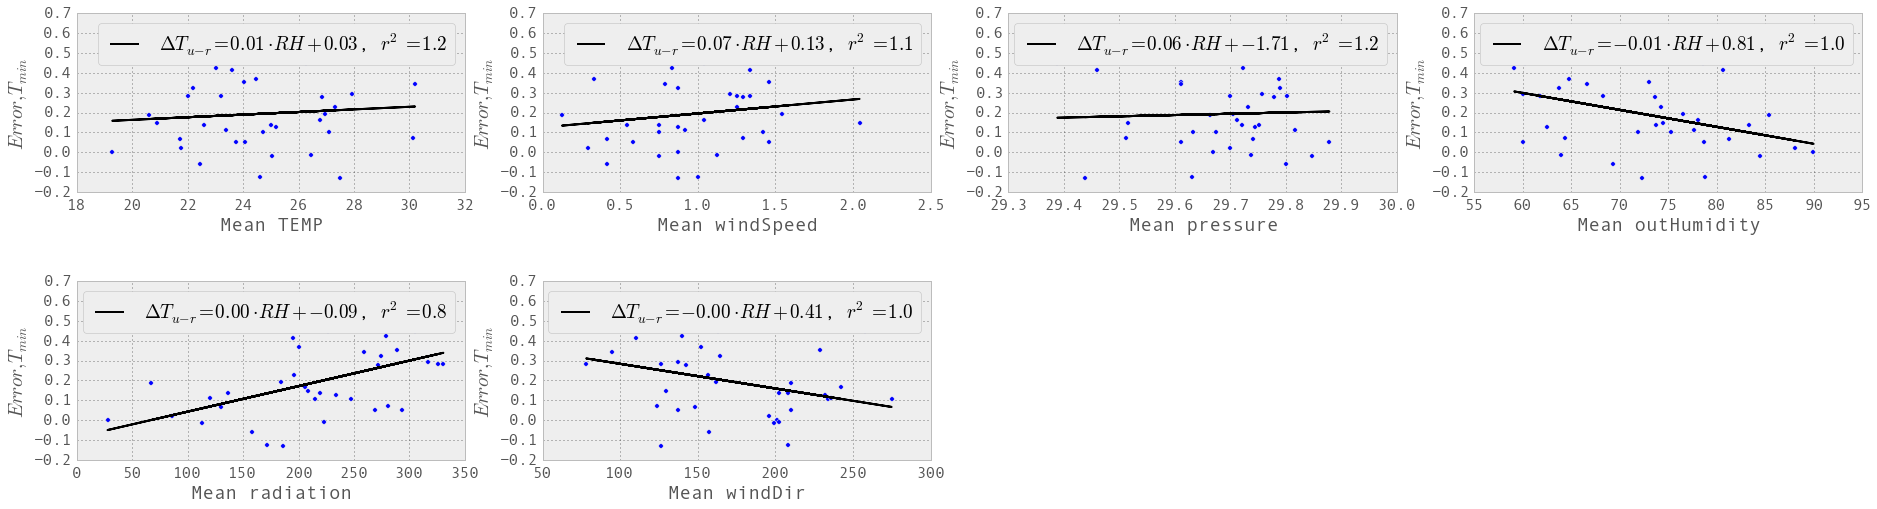

In [667]:
buttons = [86, 107, 53, 90, 35]
fig0, fig1, fig2 = errorplot(buttons, olinhalldf, "OlinHall",'2015-06-22', '2015-07-28')

NameError: global name 'DataError' is not defined

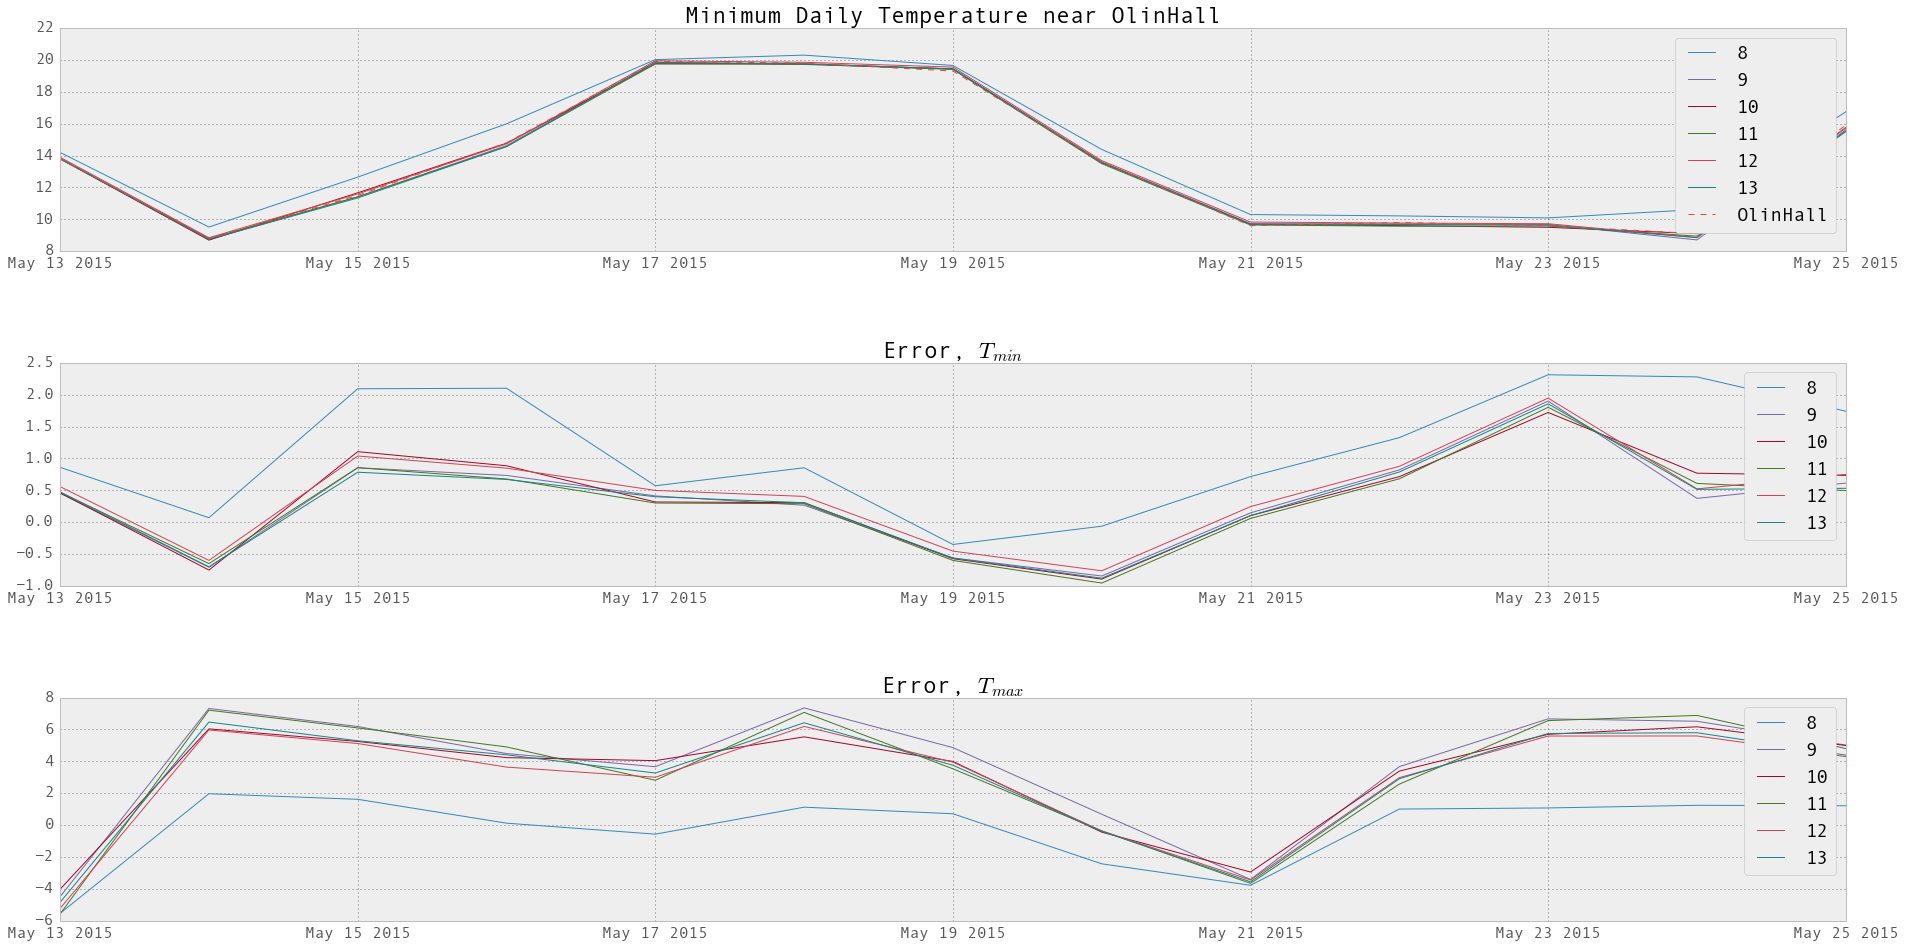

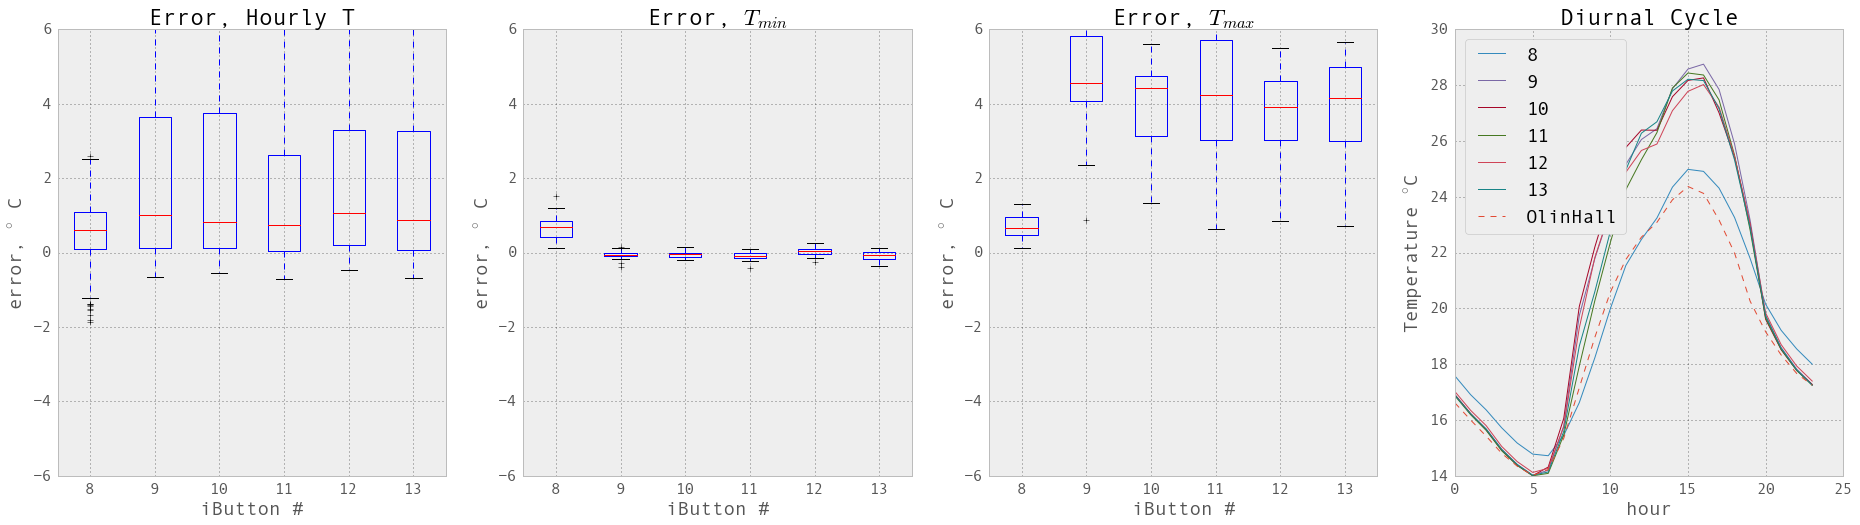

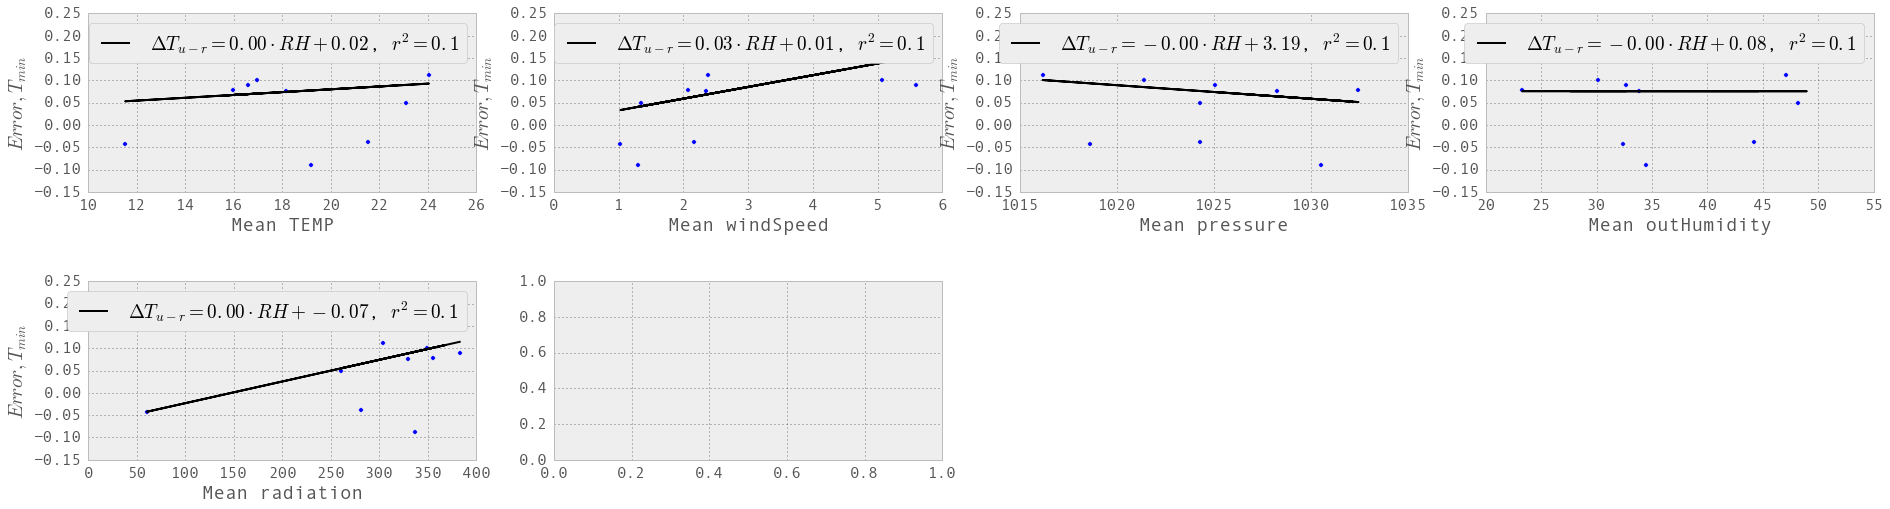

In [58]:
startdate = '2015-05-13'
enddate = '2015-05-25'
buttons = [8,9,10,11,12,13] #14, 15 appear to be inside data, don't have a diurnal cycle
fig0, fig1, fig2 = errorplot(buttons, roofobsDF.resample('H', how= 'first'), "OlinHall", startdate, enddate, rooftempDF)

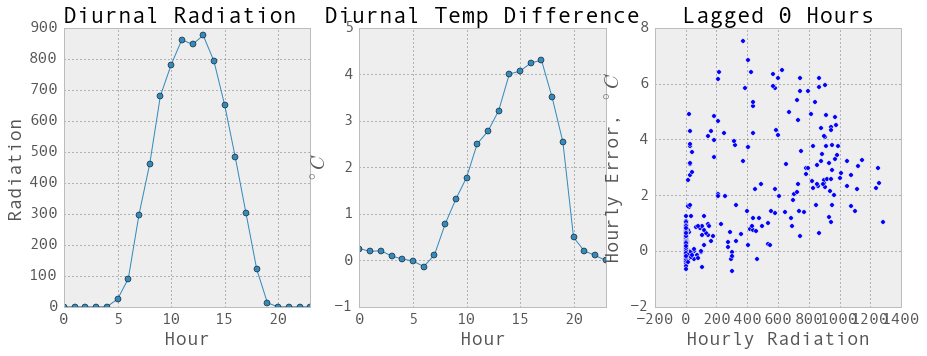

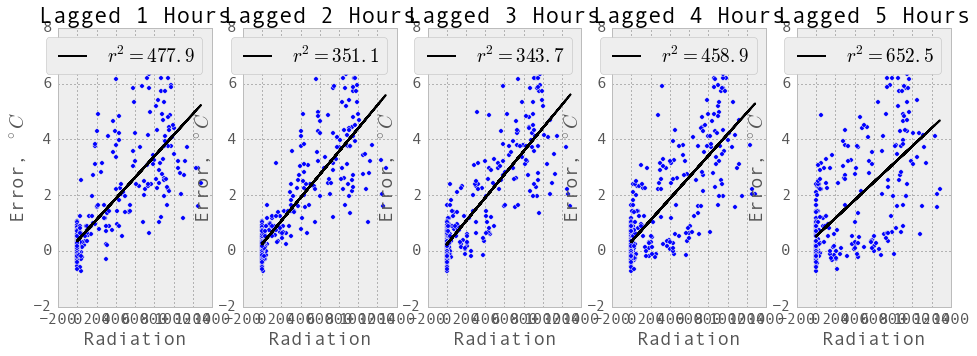

In [125]:
plt.figure(figsize=[15,5])
plt.subplot(1,3,1)
roofobsDF[startdate:enddate].radiation.groupby(roofobsDF[startdate:enddate].index.hour).mean().plot(style = '-o')
plt.title('Diurnal Radiation ')
plt.xlabel('Hour')
plt.ylabel('Radiation')

plt.subplot(1,3,2)
err = rooftempDF[11][startdate:enddate] - roofobsDF.TEMP.resample('H', how= 'first')[startdate:enddate]
err.groupby(err.index.hour).mean().plot(style = '-o')
plt.title('Diurnal Temp Difference')
plt.xlabel('Hour')
plt.ylabel('$^\circ C$')

plt.subplot(1,3,3)
plt.scatter(roofobsDF.radiation.resample('H', how= 'first')[startdate:enddate], err)
plt.xlabel('Hourly Radiation')
plt.ylabel('Hourly Error, $^\circ C$')
plt.title('Lagged 0 Hours')
plt.figure(figsize = [16,5])

i = 1
lags = np.arange(1,6)
x = roofobsDF.radiation.resample('H', how= 'first')[startdate:enddate]
for lag in lags: 
    plt.subplot(1,lags.shape[0],i)   
    plt.scatter(x[0:-lag], err[lag:])
    index = ~np.isnan(x.values[0:-lag]) & ~np.isnan(err.values[lag:])
    p, res, _, _, _ = np.polyfit(x[0:-lag][index],err[lag:][index],1, full= True)
    m = p[0]
    b= p[1]
    plt.plot(x, m*x+b,color = 'k', # pd.tools.plotting._get_standard_colors(3)[0],
             lw =2,
             label = '$r^2 = %2.1f$'%(res),
             )
    plt.legend()
    plt.xlabel('Radiation')
    plt.ylabel('Error, $^\circ C$')
    plt.title('Lagged %s Hours'%lag)
    i = i+1

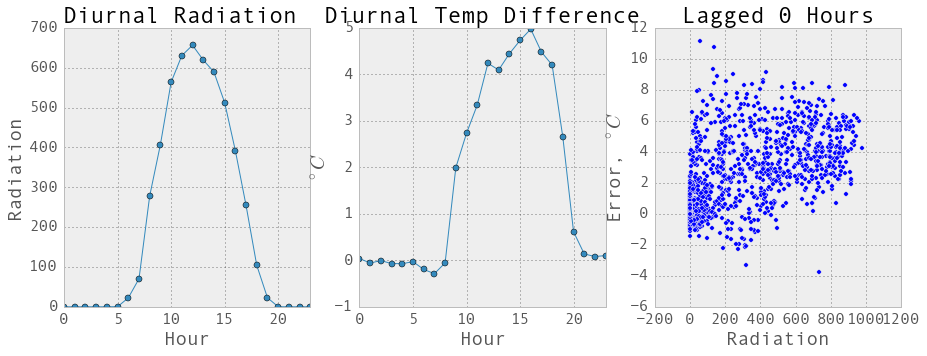

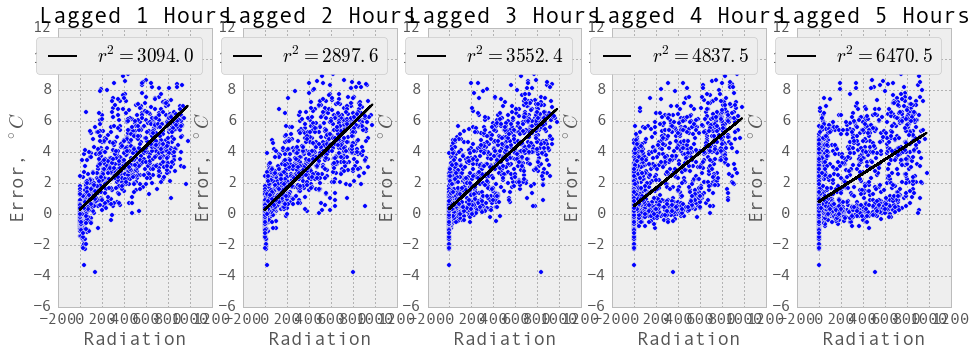

In [127]:
startdate = '2015-07-1' 
enddate = '2015-09-10'
button = 107 #86
plt.figure(figsize=[15,5])
plt.subplot(1,3,1)
olinhalldf[startdate:enddate].radiation.groupby(olinhalldf[startdate:enddate].index.hour).mean().plot(style = '-o')
plt.title('Diurnal Radiation ')
plt.xlabel('Hour')
plt.ylabel('Radiation')

plt.subplot(1,3,2)
err = tempDF[button][startdate:enddate] - olinhalldf.TEMP.resample('H', how= 'first')[startdate:enddate]
err.groupby(err.index.hour).mean().plot(style = '-o')
plt.title('Diurnal Temp Difference')
plt.xlabel('Hour')
plt.ylabel('$^\circ C$')

plt.subplot(1,3,3)
plt.scatter(olinhalldf.radiation.resample('H', how= 'first')[startdate:enddate], err)
plt.xlabel('Radiation')
plt.ylabel('Error, $^\circ C$')
plt.title('Lagged 0 Hours')
plt.figure(figsize = [16,5])

i = 1
lags = np.arange(1,6)
x = olinhalldf.radiation.resample('H', how= 'first')[startdate:enddate]
for lag in lags: 
    plt.subplot(1,lags.shape[0],i)   
    plt.scatter(x[0:-lag], err[lag:])
    index = ~np.isnan(x.values[0:-lag]) & ~np.isnan(err.values[lag:])
    p, res, _, _, _ = np.polyfit(x[0:-lag][index],err[lag:][index],1, full= True)
    m = p[0]
    b= p[1]
    plt.plot(x, m*x+b,color = 'k', # pd.tools.plotting._get_standard_colors(3)[0],
             lw =2,
             label = '$r^2 = %2.1f$'%(res),
             )
    plt.legend()
    plt.xlabel('Radiation')
    plt.ylabel('Error, $^\circ C$')
    plt.title('Lagged %s Hours'%lag)
    i = i+1

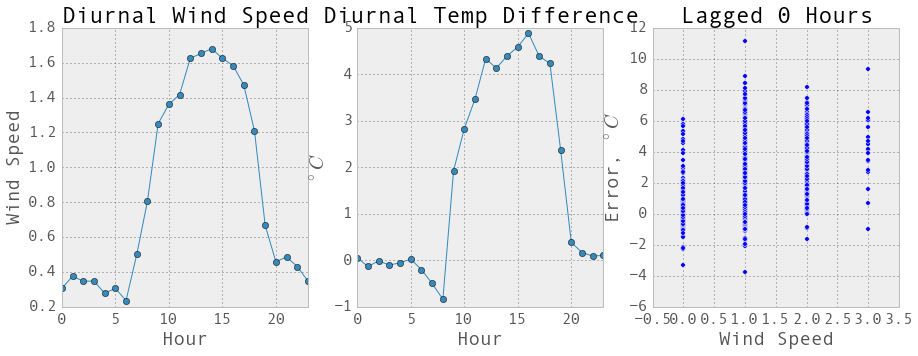

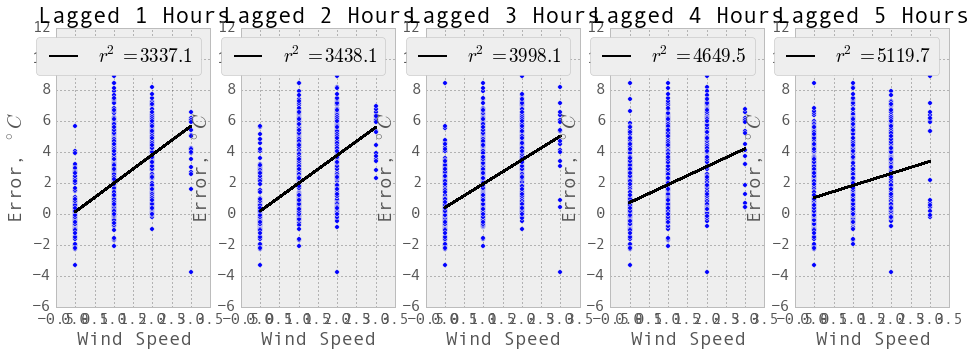

In [633]:
startdate = '2015-07-1' 
enddate = '2015-09-10'
button = 107 #86
plt.figure(figsize=[15,5])
plt.subplot(1,3,1)
olinhalldf[startdate:enddate].windSpeed.groupby(olinhalldf[startdate:enddate].index.hour).mean().plot(style = '-o')
plt.title('Diurnal Wind Speed ')
plt.xlabel('Hour')
plt.ylabel('Wind Speed')

plt.subplot(1,3,2)
err = tempDF[button][startdate:enddate] - olinhalldf.TEMP.resample('H', how= 'first')[startdate:enddate]
err.groupby(err.index.hour).mean().plot(style = '-o')
plt.title('Diurnal Temp Difference')
plt.xlabel('Hour')
plt.ylabel('$^\circ C$')

plt.subplot(1,3,3)
plt.scatter(olinhalldf.windSpeed.resample('H', how= 'first')[startdate:enddate], err)
plt.xlabel('Wind Speed')
plt.ylabel('Error, $^\circ C$')
plt.title('Lagged 0 Hours')
plt.figure(figsize = [16,5])

i = 1
lags = np.arange(1,6)
x = olinhalldf.windSpeed.resample('H', how= 'first')[startdate:enddate]
for lag in lags: 
    plt.subplot(1,lags.shape[0],i)   
    plt.scatter(x[0:-lag], err[lag:])
    index = ~np.isnan(x.values[0:-lag]) & ~np.isnan(err.values[lag:])
    p, res, _, _, _ = np.polyfit(x[0:-lag][index],err[lag:][index],1, full= True)
    m = p[0]
    b= p[1]
    plt.plot(x, m*x+b,color = 'k', # pd.tools.plotting._get_standard_colors(3)[0],
             lw =2,
             label = '$r^2 = %2.1f$'%(res),
             )
    plt.legend()
    plt.xlabel('Wind Speed')
    plt.ylabel('Error, $^\circ C$')
    plt.title('Lagged %s Hours'%lag)
    i = i+1

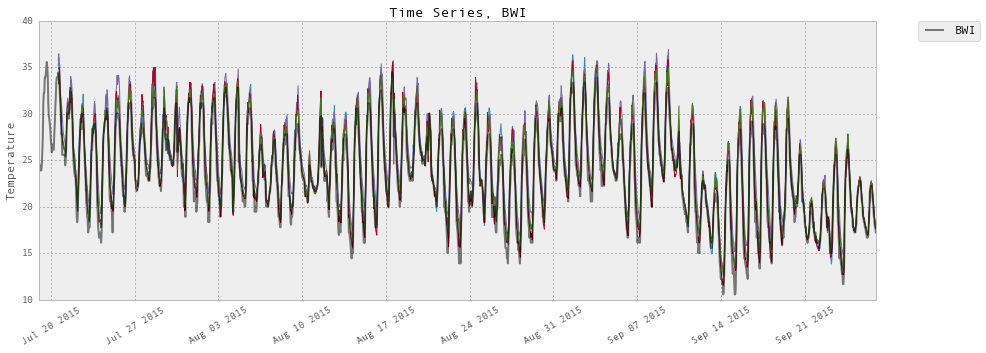

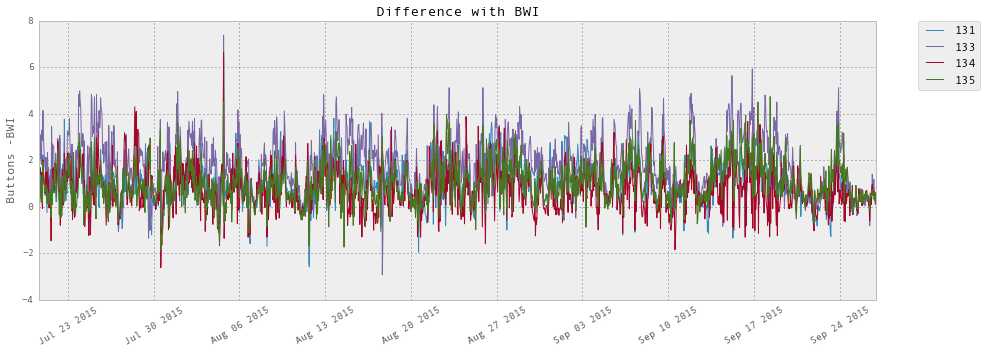

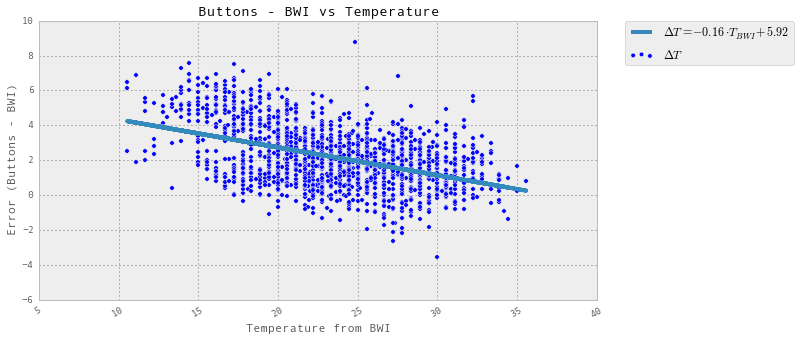

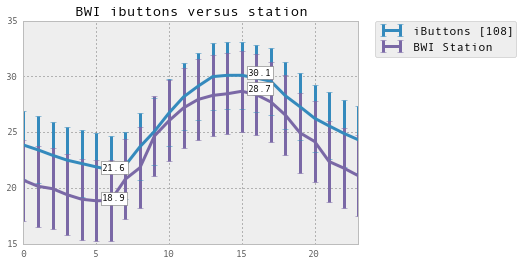

In [75]:
# plot timeseries of BWI and ibutton sensors
fig = plt.figure(figsize=[15,5])
#buttons = [131, 132, 133, 134, 135]
buttons = [131, 133, 134, 135] #BWI 133


plt.plot(tempDF['2015-07-19':'2015-09-26'].index, tempDF['2015-07-19':'2015-09-26'][buttons])
plt.plot(ruraldf['2015-07-19':'2015-09-26'].index, ruraldf['2015-07-19':'2015-09-26'].TEMP, 
         label = 'BWI', color = 'k', alpha = .5, linewidth = 2)
lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol = 1)
plt.title('Time Series, BWI')
plt.ylabel('Temperature')
plt.xticks(rotation=30)
plt.show()
plt.savefig('plots/bwitimeseries.eps', format = 'eps', dpi = 600,
                    bbox_extra_artists=(lgd,), bbox_inches='tight')

# plot timeseries of ibutton sensors -BWI
fig = plt.figure(figsize=[15,5])
plt.plot(tempDF['2015-07-19':'2015-09-26'].index, tempDF['2015-07-19':'2015-09-26'][buttons]-ruraldf['2015-07-19':'2015-09-26'].TEMP)
#plt.plot(ruraldf['2015-07-19':'2015-09-26'].index, ruraldf['2015-07-19':'2015-09-26'].TEMP, label = 'BWI', linewidth = 3)
lgd = plt.legend(buttons, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol = 1)
plt.title('Difference with BWI')
plt.xticks(rotation=30)
plt.ylabel('Buttons -BWI')
plt.show()
plt.savefig('plots/bwi-buttonstimeseries.eps', format = 'eps', dpi = 600,
                    bbox_extra_artists=(lgd,), bbox_inches='tight')

# Plot "error" vs temp 
buttons = [108]
fig = plt.figure(figsize=[10,5])
x = ruraldf['2015-07-19':'2015-09-26'].TEMP
y = tempDF['2015-07-19':'2015-09-26'][buttons]-ruraldf['2015-07-19':'2015-09-26'].TEMP
plt.scatter(x,y, 
            label = '$\Delta T$')

m,b = np.polyfit(x, y,1)
plt.plot(x, m*x+b, 
             color = pd.tools.plotting._get_standard_colors(3)[0],
             lw =4,
             label = '$\Delta T=%.2f \cdot T_{BWI}+%.2f$'%(m,b),
             )
plt.title('Buttons - BWI vs Temperature ')
plt.xlabel('Temperature from BWI')
plt.ylabel('Error (Buttons - BWI)')
plt.xticks(rotation=30)
lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol = 1)
plt.show()
plt.savefig('plots/errorvstempSC.eps', format = 'eps', dpi = 600,
                    bbox_extra_artists=(lgd,), bbox_inches='tight')

# plot the diurnal variation
#ibuttons
tempDF['2015-07-19':'2015-09-26'][buttons].groupby(tempDF['2015-07-19':'2015-09-26'].index.hour).mean().mean(axis=1).plot(
    yerr = tempDF['2015-07-19':'2015-09-26'][buttons].groupby(tempDF['2015-07-19':'2015-09-26'].index.hour).mean().mean(axis=1).std(), 
    label = 'iButtons %s'%buttons, 
    linewidth = 3,
    )
maximum = tempDF['2015-07-19':'2015-09-26'][buttons].groupby(tempDF['2015-07-19':'2015-09-26'].index.hour).mean().mean(axis=1).max()
plt.text(15.5, maximum,
                 '%2.1f'%maximum,
                 bbox=dict(facecolor='white', edgecolor = '#636363')
                 )

minimum = tempDF['2015-07-19':'2015-09-26'][buttons].groupby(tempDF['2015-07-19':'2015-09-26'].index.hour).mean().mean(axis=1).min()
plt.text(5.5, minimum,
                 '%2.1f'%minimum,
                 bbox=dict(facecolor='white', edgecolor = '#636363')
                 )

#observations
ruraldf['2015-07-19':'2015-09-26'].TEMP.groupby(ruraldf['2015-07-19':'2015-09-26'].index.hour).mean().plot(
    yerr = ruraldf['2015-07-19':'2015-09-26'].TEMP.groupby(ruraldf['2015-07-19':'2015-09-26'].index.hour).mean().std(), 
    label = 'BWI Station', 
    linewidth = 3,)
maximum = ruraldf['2015-07-19':'2015-09-26'].TEMP.groupby(ruraldf['2015-07-19':'2015-09-26'].index.hour).mean().max()
plt.text(15.5, maximum,
                 '%2.1f'%maximum,
                 bbox=dict(facecolor='white', edgecolor = '#636363')
                 )
minimum = ruraldf['2015-07-19':'2015-09-26'].TEMP.groupby(ruraldf['2015-07-19':'2015-09-26'].index.hour).mean().min()
plt.text(5.5, minimum,
                 '%2.1f'%minimum,
                 bbox=dict(facecolor='white', edgecolor = '#636363')
                 )
plt.title('BWI ibuttons versus station')
lgd = plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol = 1)
plt.savefig('plots/bwibuttonsdiurnal.eps', format = 'eps', dpi = 600,
                    bbox_extra_artists=(lgd,), bbox_inches='tight')

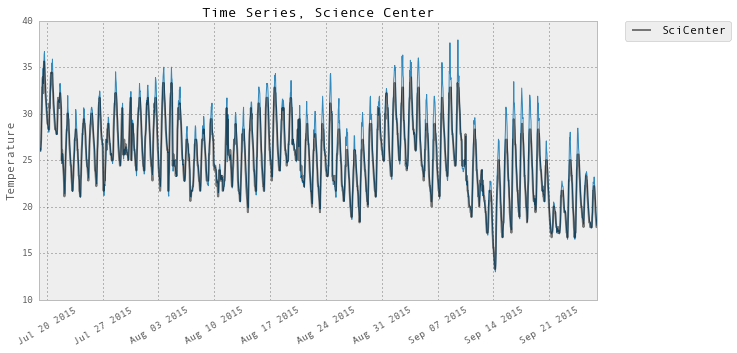

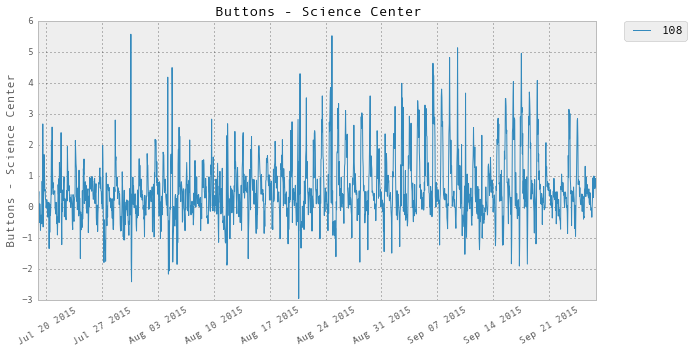

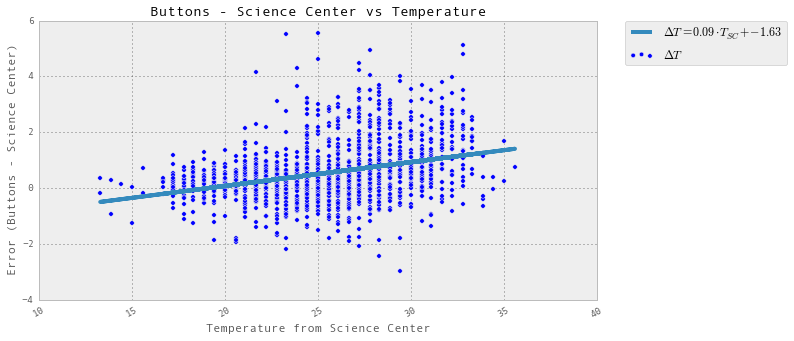

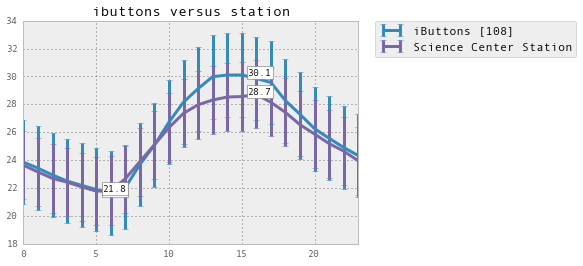

In [19]:
## plot timeseries of Science Center and ibutton sensors
fig = plt.figure(figsize=[10,5])
#buttons = [108, 111, 105, 81]
buttons = [108]
plt.plot(tempDF['2015-07-19':'2015-09-26'].index, tempDF['2015-07-19':'2015-09-26'][buttons])
plt.plot(urbandf['2015-07-19':'2015-09-26'].index, urbandf['2015-07-19':'2015-09-26'].TEMP, 
         label = 'SciCenter', color = 'k', alpha = .5, linewidth = 2)
lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol = 1)
plt.title('Time Series, Science Center')
plt.ylabel('Temperature')
plt.xticks(rotation=30)
plt.show()
plt.savefig( 'plots/108sctimeseries.eps', format = 'eps', 
                    bbox_extra_artists=(lgd,), bbox_inches='tight')

# plot timeseries of ibutton sensors -BWI
fig = plt.figure(figsize=[10,5])
plt.plot(tempDF['2015-07-19':'2015-09-26'].index, tempDF['2015-07-19':'2015-09-26'][buttons]-urbandf['2015-07-19':'2015-09-26'].TEMP)
#plt.plot(ruraldf['2015-07-19':'2015-09-26'].index, ruraldf['2015-07-19':'2015-09-26'].TEMP, label = 'BWI', linewidth = 3)
lgd = plt.legend(buttons, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol = 1)
plt.title('Buttons - Science Center')
plt.ylabel('Buttons - Science Center')
plt.xticks(rotation=30)
plt.show()
plt.savefig( 'plots/108-sctimeseries.eps', format = 'eps',
                    bbox_extra_artists=(lgd,), bbox_inches='tight')

# Plot "error" vs temp 
fig = plt.figure(figsize=[10,5])
x = urbandf['2015-07-19':'2015-09-26'].TEMP
y = tempDF['2015-07-19':'2015-09-26'][buttons]-urbandf['2015-07-19':'2015-09-26'].TEMP
plt.scatter(x,y, 
            label = '$\Delta T$')

m,b = np.polyfit(x, y,1)
plt.plot(x, m*x+b, 
             color = pd.tools.plotting._get_standard_colors(3)[0],
             lw =4,
             label = '$\Delta T=%.2f \cdot T_{SC}+%.2f$'%(m,b),
             )
plt.title('Buttons - Science Center vs Temperature ')
plt.xlabel('Temperature from Science Center')
plt.ylabel('Error (Buttons - Science Center)')
plt.xticks(rotation=30)
lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol = 1)
plt.show()
plt.savefig('plots/errorvstempSC.eps', format = 'eps', dpi = 600,
                    bbox_extra_artists=(lgd,), bbox_inches='tight')

# Plot diurnal variation
#ibuttons
tempDF['2015-07-19':'2015-09-26'][buttons].groupby(tempDF['2015-07-19':'2015-09-26'].index.hour).mean().mean(axis=1).plot(
    yerr = tempDF['2015-07-19':'2015-09-26'][buttons].groupby(tempDF['2015-07-19':'2015-09-26'].index.hour).mean().mean(axis=1).std(), 
    label = 'iButtons %s'%buttons, 
    linewidth = 3,
    )
maximum = tempDF['2015-07-19':'2015-09-26'][buttons].groupby(tempDF['2015-07-19':'2015-09-26'].index.hour).mean().mean(axis=1).max()
plt.text(15.5, maximum,
                 '%2.1f'%maximum,
                 bbox=dict(facecolor='white', edgecolor = '#636363')
                 )

minimum = tempDF['2015-07-19':'2015-09-26'][buttons].groupby(tempDF['2015-07-19':'2015-09-26'].index.hour).mean().mean(axis=1).min()
plt.text(5.5, minimum,
                 '%2.1f'%minimum,
                 bbox=dict(facecolor='white', edgecolor = '#636363')
                 )

#observations
urbandf['2015-07-19':'2015-09-26'].TEMP.groupby(urbandf['2015-07-19':'2015-09-26'].index.hour).mean().plot(
    yerr = urbandf['2015-07-19':'2015-09-26'].TEMP.groupby(urbandf['2015-07-19':'2015-09-26'].index.hour).mean().std(), 
    label = 'Science Center Station', 
    linewidth = 3,)
maximum = urbandf['2015-07-19':'2015-09-26'].TEMP.groupby(urbandf['2015-07-19':'2015-09-26'].index.hour).mean().max()
plt.text(15.5, maximum,
                 '%2.1f'%maximum,
                 bbox=dict(facecolor='white', edgecolor = '#636363')
                 )
minimum = urbandf['2015-07-19':'2015-09-26'].TEMP.groupby(urbandf['2015-07-19':'2015-09-26'].index.hour).mean().min()
plt.text(5.5, minimum,
                 '%2.1f'%minimum,
                 bbox=dict(facecolor='white', edgecolor = '#636363')
                 )
plt.title('ibuttons versus station')
lgd = plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol = 1)
plt.savefig('plots/bwibuttonsdiurnal.eps', format = 'eps', dpi = 600,
                    bbox_extra_artists=(lgd,), bbox_inches='tight')

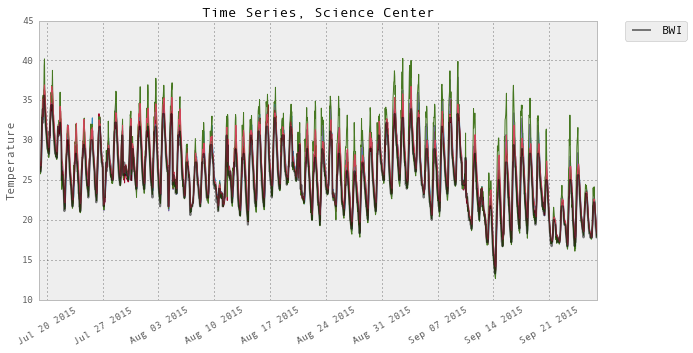

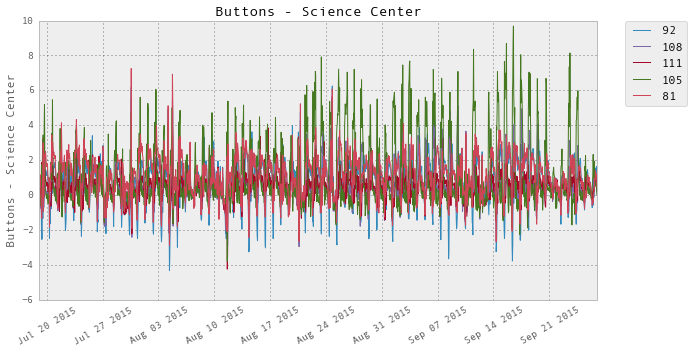

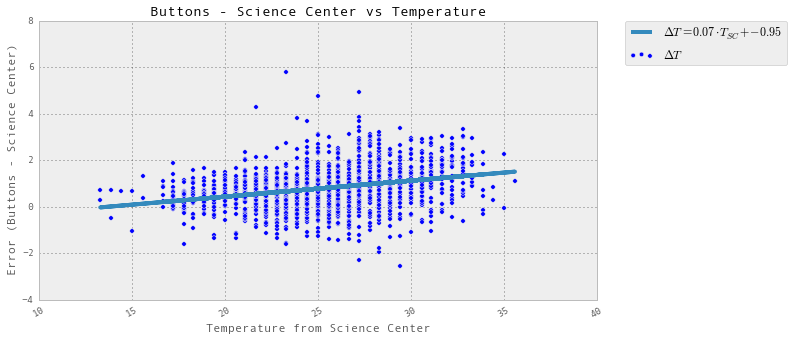

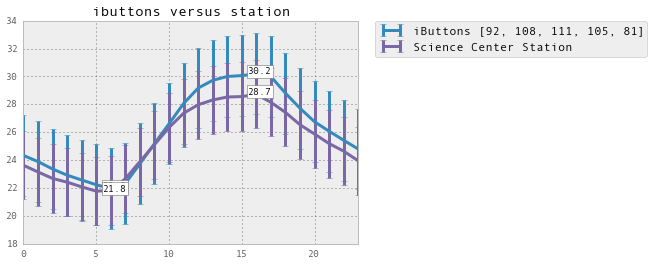

In [33]:
# plot time series of everything
fig = plt.figure(figsize=[10,5])
buttons = [92, 108, 111, 105, 81]
plt.plot(tempDF['2015-07-19':'2015-09-26'].index, tempDF['2015-07-19':'2015-09-26'][buttons])
plt.plot(urbandf['2015-07-19':'2015-09-26'].index, urbandf['2015-07-19':'2015-09-26'].TEMP, 
         label = 'BWI', color = 'k', alpha = .5, linewidth = 2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol = 1)
plt.title('Time Series, Science Center')
plt.ylabel('Temperature')
plt.xticks(rotation=30)
plt.show()
plt.savefig('plots/buttonssctimeseries.eps')

# plot timeseries of ibutton sensors -BWI
fig = plt.figure(figsize=[10,5])
plt.plot(tempDF['2015-07-19':'2015-09-26'].index, tempDF['2015-07-19':'2015-09-26'][buttons]-urbandf['2015-07-19':'2015-09-26'].TEMP)
#plt.plot(ruraldf['2015-07-19':'2015-09-26'].index, ruraldf['2015-07-19':'2015-09-26'].TEMP, label = 'BWI', linewidth = 3)
plt.legend(buttons, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol = 1)
plt.title('Buttons - Science Center')
plt.ylabel('Buttons - Science Center')
plt.xticks(rotation=30)
plt.show()
plt.savefig('plots/buttons-sctimeseries.eps')

# Plot "error" vs temp 
fig = plt.figure(figsize=[10,5])
x = urbandf['2015-07-19':'2015-09-26'].TEMP
y = tempDF['2015-07-19':'2015-09-26'][buttons].mean(axis=1)-urbandf['2015-07-19':'2015-09-26'].TEMP
plt.scatter(x,y, 
            label = '$\Delta T$')

m,b = np.polyfit(x, y,1)
plt.plot(x, m*x+b, 
             color = pd.tools.plotting._get_standard_colors(3)[0],
             lw =4,
             label = '$\Delta T=%.2f \cdot T_{SC}+%.2f$'%(m,b),
             )
plt.title('Buttons - Science Center vs Temperature ')
plt.xlabel('Temperature from Science Center')
plt.ylabel('Error (Buttons - Science Center)')
plt.xticks(rotation=30)
lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol = 1)
plt.show()
plt.savefig('plots/errorvstempSC.eps', format = 'eps', dpi = 600,
                    bbox_extra_artists=(lgd,), bbox_inches='tight')


# plot the diurnal variation

# Plot diurnal variation
#ibuttons
tempDF['2015-07-19':'2015-09-26'][buttons].groupby(tempDF['2015-07-19':'2015-09-26'].index.hour).mean().mean(axis=1).plot(
    yerr = tempDF['2015-07-19':'2015-09-26'][buttons].groupby(tempDF['2015-07-19':'2015-09-26'].index.hour).mean().mean(axis=1).std(), 
    label = 'iButtons %s'%buttons, 
    linewidth = 3,
    )
maximum = tempDF['2015-07-19':'2015-09-26'][buttons].groupby(tempDF['2015-07-19':'2015-09-26'].index.hour).mean().mean(axis=1).max()
plt.text(15.5, maximum,
                 '%2.1f'%maximum,
                 bbox=dict(facecolor='white', edgecolor = '#636363')
                 )

minimum = tempDF['2015-07-19':'2015-09-26'][buttons].groupby(tempDF['2015-07-19':'2015-09-26'].index.hour).mean().mean(axis=1).min()
plt.text(5.5, minimum,
                 '%2.1f'%minimum,
                 bbox=dict(facecolor='white', edgecolor = '#636363')
                 )

#observations
urbandf['2015-07-19':'2015-09-26'].TEMP.groupby(urbandf['2015-07-19':'2015-09-26'].index.hour).mean().plot(
    yerr = urbandf['2015-07-19':'2015-09-26'].TEMP.groupby(urbandf['2015-07-19':'2015-09-26'].index.hour).mean().std(), 
    label = 'Science Center Station', 
    linewidth = 3,)
maximum = urbandf['2015-07-19':'2015-09-26'].TEMP.groupby(urbandf['2015-07-19':'2015-09-26'].index.hour).mean().max()
plt.text(15.5, maximum,
                 '%2.1f'%maximum,
                 bbox=dict(facecolor='white', edgecolor = '#636363')
                 )
minimum = urbandf['2015-07-19':'2015-09-26'].TEMP.groupby(urbandf['2015-07-19':'2015-09-26'].index.hour).mean().min()
plt.text(5.5, minimum,
                 '%2.1f'%minimum,
                 bbox=dict(facecolor='white', edgecolor = '#636363')
                 )
plt.title('ibuttons versus station')
lgd = plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol = 1)
plt.savefig('plots/bwibuttonsdiurnal.eps', format = 'eps', dpi = 600,
                    bbox_extra_artists=(lgd,), bbox_inches='tight')

plt.savefig('plots/buttonsscicenterdiurnal.eps')

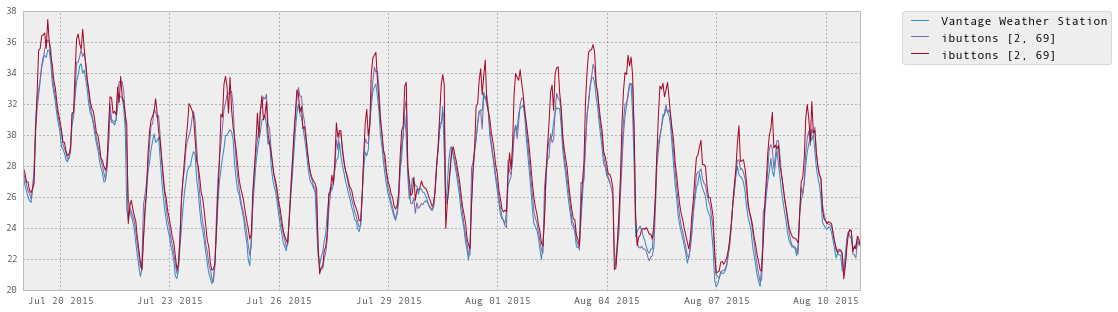

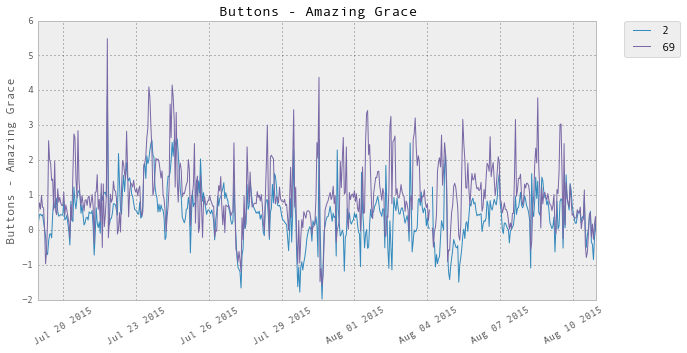

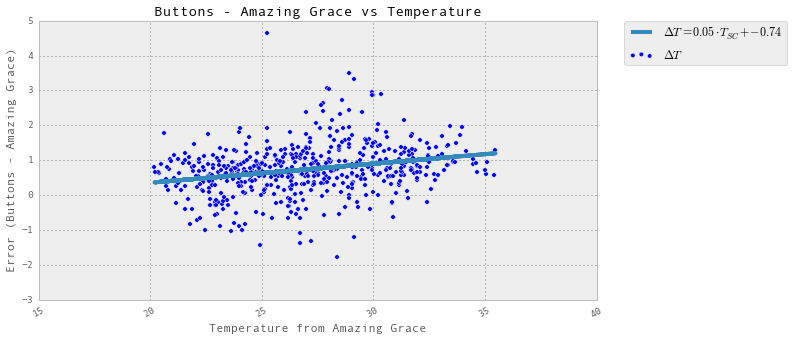

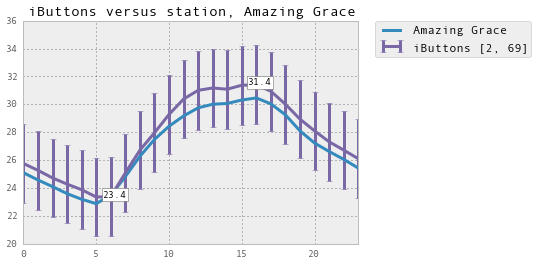

In [77]:
# Buttons vs. Amazing Grace 

# Time series of temperatures
fig = plt.figure(figsize=[15,5])
buttons = [2, 69] # Amazing Grace

plt.plot(amazinggracedf['2015-07-19':'2015-08-10'].index, amazinggracedf['2015-07-19':'2015-08-10'].outTemp, label ='Vantage Weather Station')
plt.plot(tempDF['2015-07-19':'2015-08-10'].index, tempDF['2015-07-19':'2015-08-10'][buttons], label = 'ibuttons %s'%buttons )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol = 1)

# plot timeseries of ibutton sensors -amazing grace
fig = plt.figure(figsize=[10,5])
plt.plot(tempDF['2015-07-19':'2015-08-10'].index, tempDF['2015-07-19':'2015-08-10'][buttons]-amazinggracedf['2015-07-19':'2015-08-10'].outTemp)
plt.legend(buttons, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol = 1)
plt.title('Buttons - Amazing Grace')
plt.ylabel('Buttons - Amazing Grace')
plt.xticks(rotation=30)
plt.show()

# Scatter "error" vs temp 
fig = plt.figure(figsize=[10,5])
x = amazinggracedf['2015-07-19':'2015-08-10'].outTemp
y = tempDF['2015-07-19':'2015-08-10'][buttons].mean(axis=1)-amazinggracedf['2015-07-19':'2015-08-10'].outTemp
plt.scatter(x,y, 
            label = '$\Delta T$')

index = np.isfinite(x) & np.isfinite(y)
m,b = np.polyfit(x[index], y[index],1)
plt.plot(x, m*x+b, 
             color = pd.tools.plotting._get_standard_colors(3)[0],
             lw =4,
             label = '$\Delta T=%.2f \cdot T_{SC}+%.2f$'%(m,b),
             )
plt.title('Buttons - Amazing Grace vs Temperature ')
plt.xlabel('Temperature from Amazing Grace')
plt.ylabel('Error (Buttons - Amazing Grace)')
plt.xticks(rotation=30)
lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol = 1)
plt.show()
plt.savefig('plots/errorvstempAG.eps', format = 'eps', dpi = 600,
                    bbox_extra_artists=(lgd,), bbox_inches='tight')


# diurnal cycle 
x.groupby(x.index.hour).mean().plot(
    label = 'Amazing Grace', 
    linewidth = 3
    )

#ibuttons
tempDF['2015-07-19':'2015-08-10'][buttons].groupby(tempDF['2015-07-19':'2015-08-10'].index.hour).mean().mean(axis=1).plot(
    yerr = tempDF['2015-07-19':'2015-08-10'][buttons].groupby(tempDF['2015-07-19':'2015-08-10'].index.hour).mean().mean(axis=1).std(), 
    label = 'iButtons %s'%buttons, 
    linewidth = 3,
    )
maximum = tempDF['2015-07-19':'2015-08-10'][buttons].groupby(tempDF['2015-07-19':'2015-08-10'].index.hour).mean().mean(axis=1).max()
plt.text(15.5, maximum,
                 '%2.1f'%maximum,
                 bbox=dict(facecolor='white', edgecolor = '#636363')
                 )

minimum = tempDF['2015-07-19':'2015-08-10'][buttons].groupby(tempDF['2015-07-19':'2015-08-10'].index.hour).mean().mean(axis=1).min()
plt.text(5.5, minimum,
                 '%2.1f'%minimum,
                 bbox=dict(facecolor='white', edgecolor = '#636363')
                 )

plt.title('iButtons versus station, Amazing Grace')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol = 1)

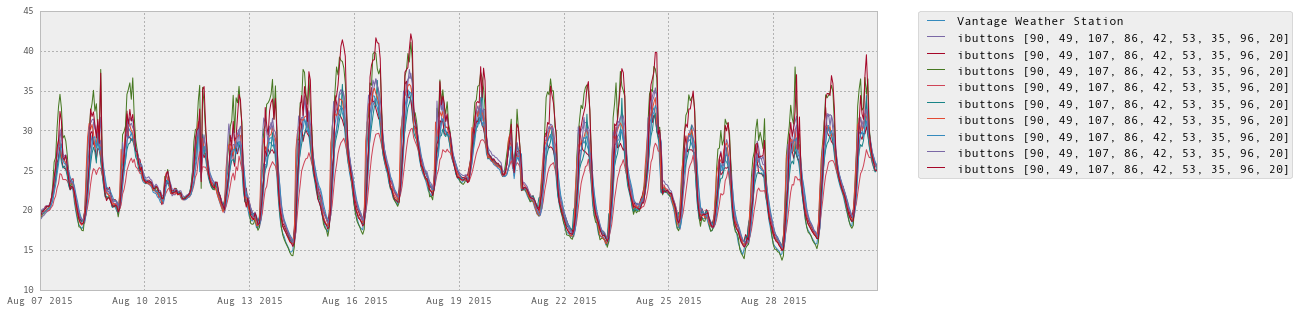

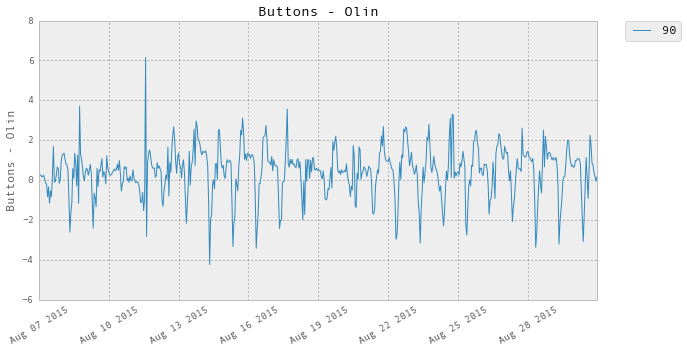

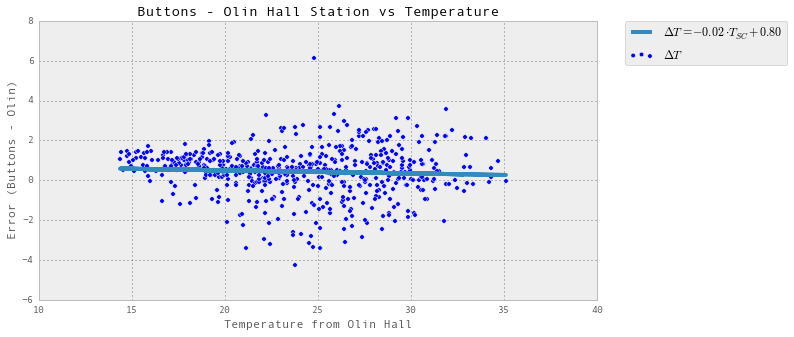

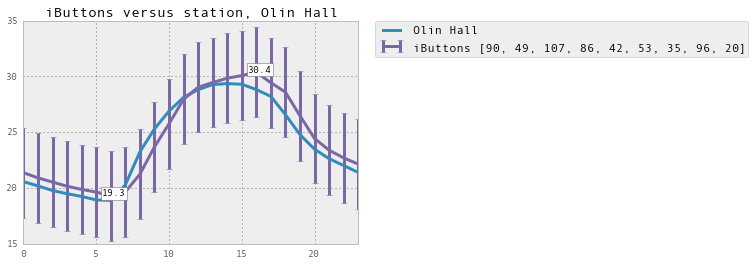

In [70]:
# Buttons vs. Olin Hall
fig = plt.figure(figsize=[15,5])
#buttons = [90, 49, 107, 86, 51, 42, 53, 35, 100, 96, 20] 
#buttons in full shade : 35 is on roof on a tree facing north 
buttons = [90, 49, 107, 86, 42, 53, 35, 96, 20] # Olin Hall

plt.plot(olinhalldf['2015-08-07':'2015-08-30'].index, olinhalldf['2015-08-07':'2015-08-30'].outTemp, label ='Vantage Weather Station')
plt.plot(tempDF['2015-08-07':'2015-08-30'].index, tempDF['2015-08-07':'2015-08-30'][buttons], label = 'ibuttons %s'%buttons )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol = 1)

# plot timeseries of ibutton sensors -amazing grace
fig = plt.figure(figsize=[10,5])
plt.plot(tempDF['2015-08-07':'2015-08-30'].index, 
         tempDF['2015-08-07':'2015-08-30'][buttons].mean(axis=1)-olinhalldf['2015-08-07':'2015-08-30'].outTemp)
#plt.plot(ruraldf['2015-07-19':'2015-09-26'].index, ruraldf['2015-07-19':'2015-09-26'].TEMP, label = 'BWI', linewidth = 3)
plt.legend(buttons, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol = 1)
plt.title('Buttons - Olin')
plt.ylabel('Buttons - Olin')
plt.xticks(rotation=30)
plt.show()

# Plot "error" vs temp 
fig = plt.figure(figsize=[10,5])
x = olinhalldf['2015-08-07':'2015-08-30'].outTemp
y = tempDF['2015-08-07':'2015-08-30'][buttons].mean(axis=1)-olinhalldf['2015-08-07':'2015-08-30'].outTemp
plt.scatter(x,y, 
            label = '$\Delta T$')

index = np.isfinite(x) & np.isfinite(y)
m,b = np.polyfit(x[index], y[index],1)
plt.plot(x, m*x+b, 
             color = pd.tools.plotting._get_standard_colors(3)[0],
             lw =4,
             label = '$\Delta T=%.2f \cdot T_{SC}+%.2f$'%(m,b),
             )
plt.title('Buttons - Olin Hall Station vs Temperature ')
plt.xlabel('Temperature from Olin Hall')
plt.ylabel('Error (Buttons - Olin)')
lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol = 1)
plt.show()
plt.savefig('plots/errorvstempOH.eps', format = 'eps', dpi = 600,
                    bbox_extra_artists=(lgd,), bbox_inches='tight')


# diurnal cycle 
olinhalldf['2015-08-07':'2015-08-30'].outTemp.groupby(olinhalldf['2015-08-07':'2015-08-30'].index.hour).mean().plot(
    label = 'Olin Hall', 
    linewidth = 3
    )

#ibuttons
tempDF['2015-08-07':'2015-08-30'][buttons].groupby(tempDF['2015-08-07':'2015-08-30'].index.hour).mean().mean(axis=1).plot(
    yerr = tempDF['2015-08-07':'2015-08-30'][buttons].groupby(tempDF['2015-08-07':'2015-08-30'].index.hour).mean().mean(axis=1).std(), 
    label = 'iButtons %s'%buttons, 
    linewidth = 3,
    )
maximum = tempDF['2015-08-07':'2015-08-30'][buttons].groupby(tempDF['2015-08-07':'2015-08-30'].index.hour).mean().mean(axis=1).max()
plt.text(15.5, maximum,
                 '%2.1f'%maximum,
                 bbox=dict(facecolor='white', edgecolor = '#636363')
                 )

minimum = tempDF['2015-08-07':'2015-08-30'][buttons].groupby(tempDF['2015-08-07':'2015-08-30'].index.hour).mean().mean(axis=1).min()
plt.text(5.5, minimum,
                 '%2.1f'%minimum,
                 bbox=dict(facecolor='white', edgecolor = '#636363')
                 )

plt.title('iButtons versus station, Olin Hall')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol = 1)

/Users/ascott47/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:588: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


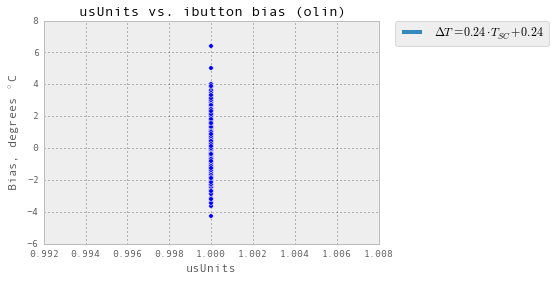

/Users/ascott47/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:588: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


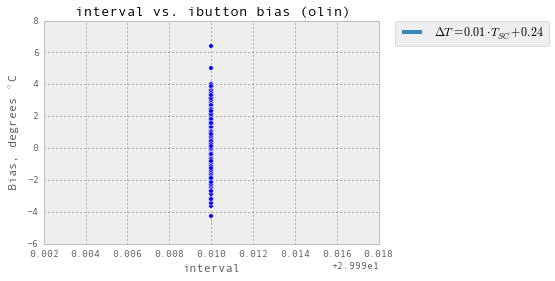

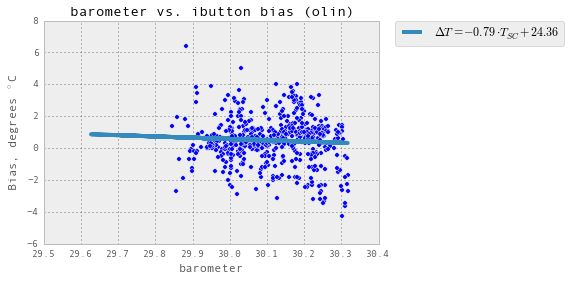

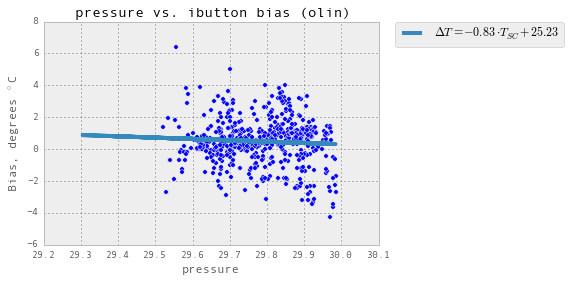

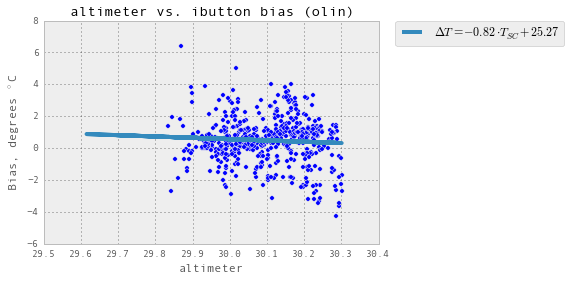

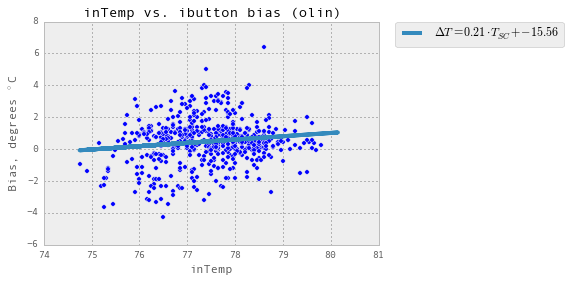

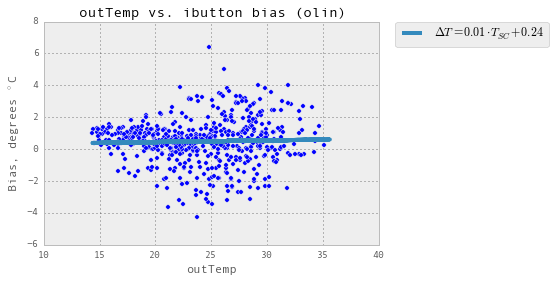

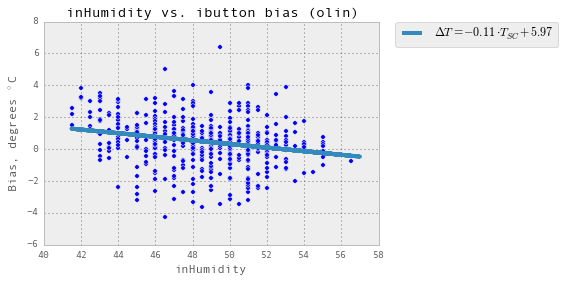

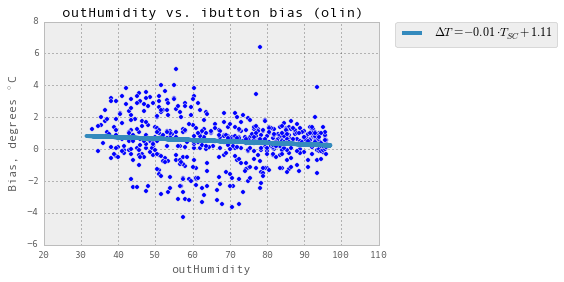

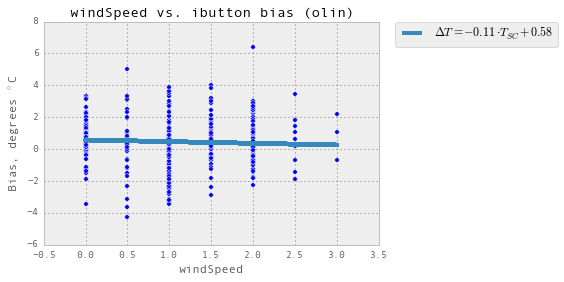

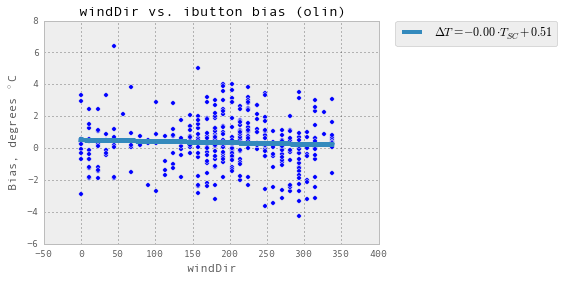

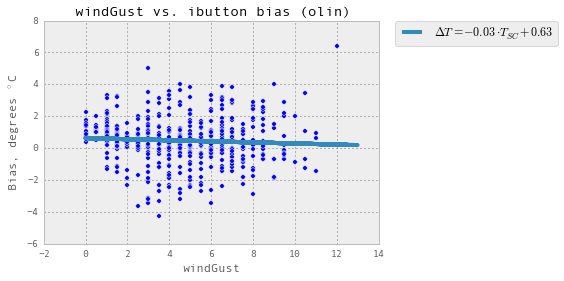

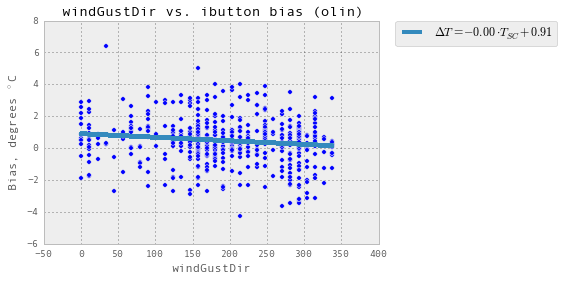

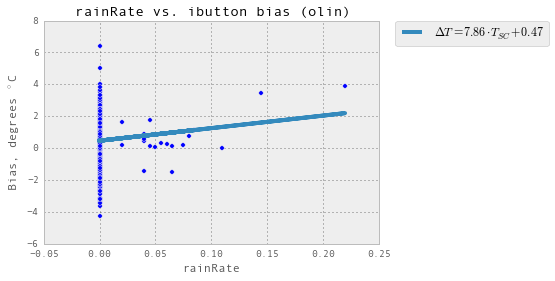

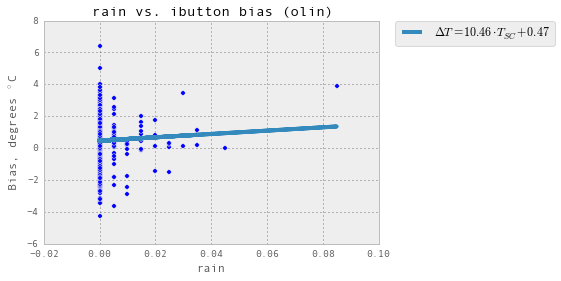

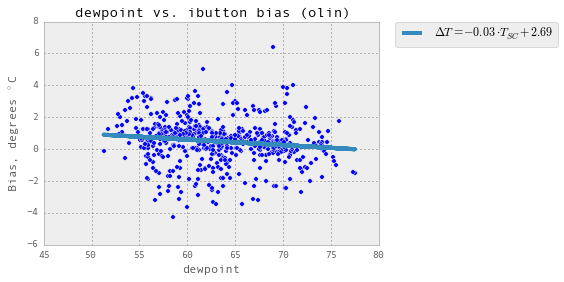

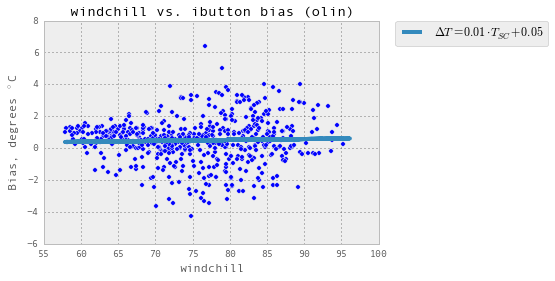

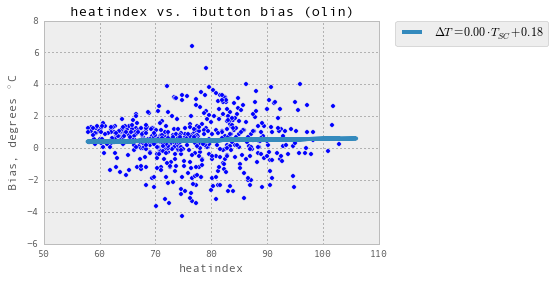

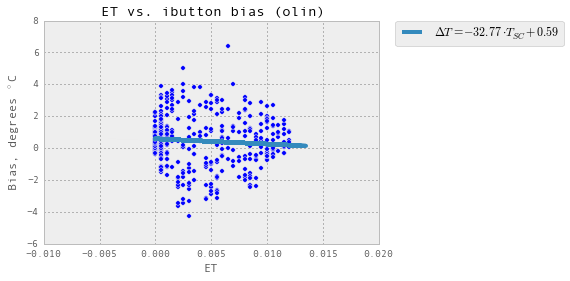

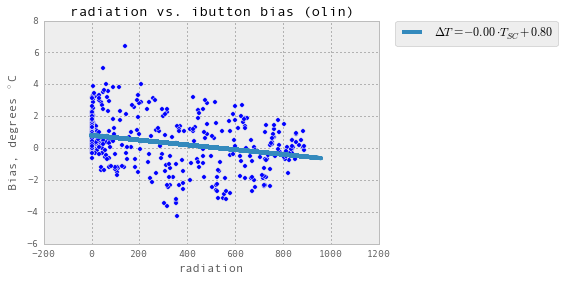

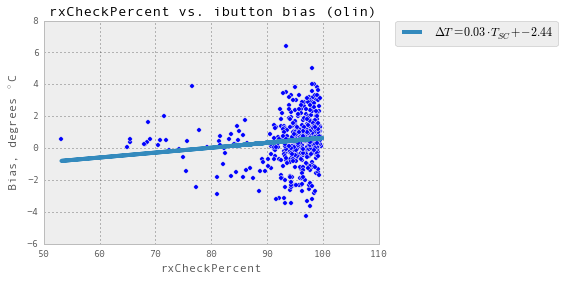

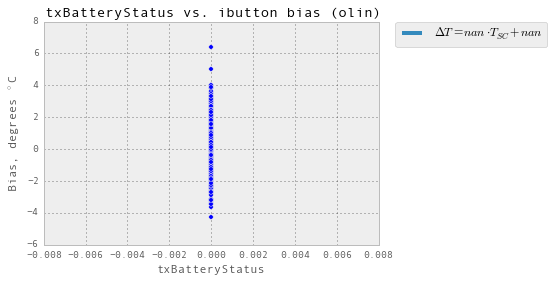

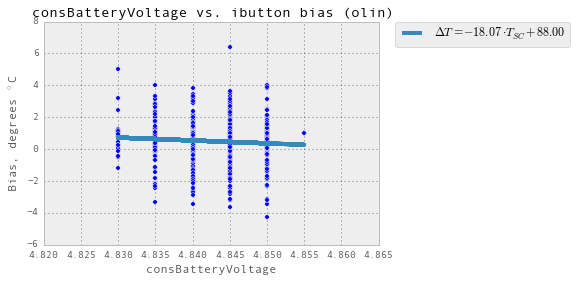

In [60]:
# olin hall bias versus weather station variables 
start = '2015-07-01'
end = '2015-08-30'
buttons = [90, 49, 107, 86, 42, 53, 35, 96, 20] # Olin Hall parking lot: 96, 20, 42,  roof: 53, 86, 35 & 90 (tree over roof)
buttons = [90, 107, 86, 53, 35, 20] # Olin Hall


for variable in olinhalldf: 
    try: 
        x = olinhalldf[variable][start:end]
        y = tempDF[start:end][buttons].mean(axis=1)-olinhalldf['2015-08-07':'2015-08-30'].outTemp
        index = ~np.isnan(x) & ~np.isnan(y)
        plt.scatter(x, y)
        m,b = np.polyfit(x[index],y[index],1)
        plt.plot(x, m*x+b,color = pd.tools.plotting._get_standard_colors(3)[0],
             lw =4,
             label = '$\Delta T=%.2f \cdot T_{SC}+%.2f$'%(m,b),
             )
        plt.ylabel('Bias, degrees $^\circ$C')
        plt.xlabel(variable)
        plt.title('%s vs. ibutton bias (olin)'%variable)
        lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol = 1)
        plt.show()
    except ValueError: 
        print 'skipping %s'%variable

/Users/ascott47/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:588: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


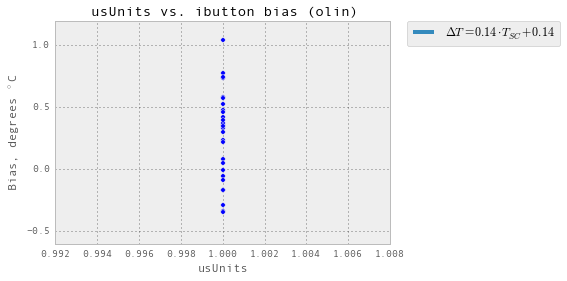

/Users/ascott47/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:588: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


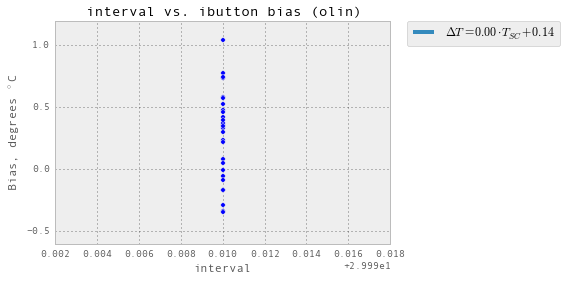

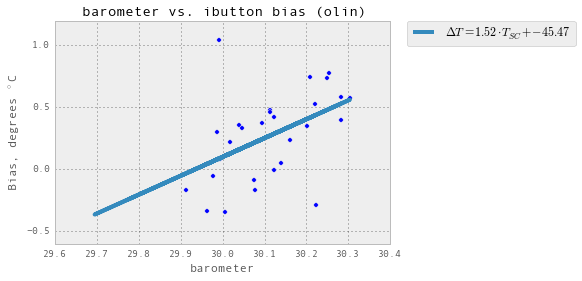

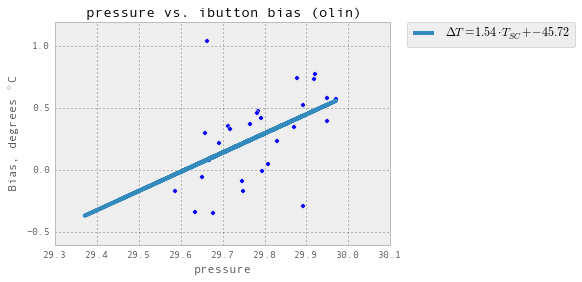

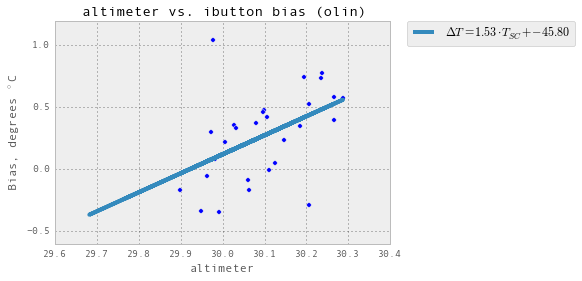

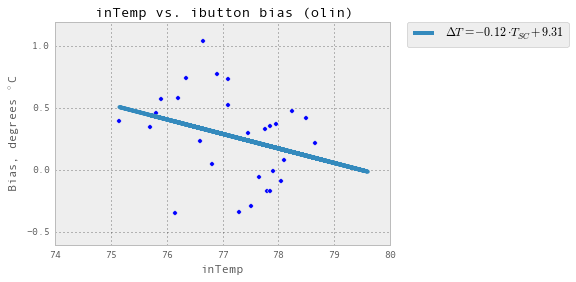

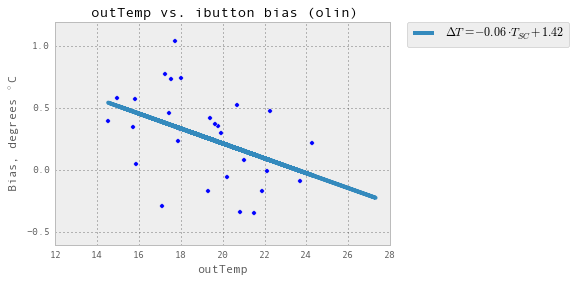

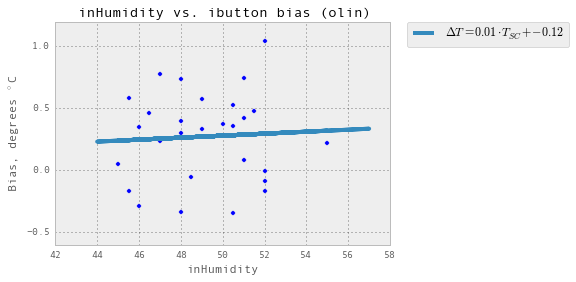

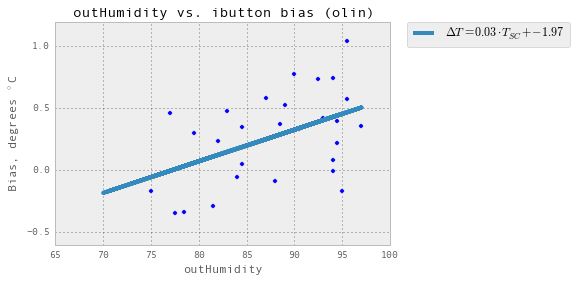

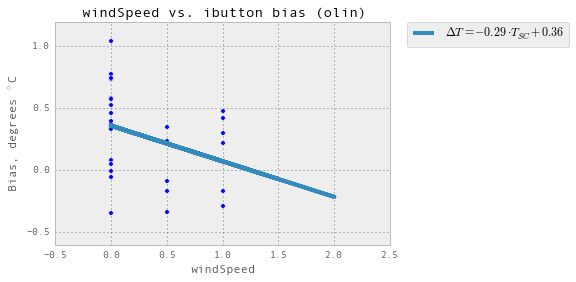

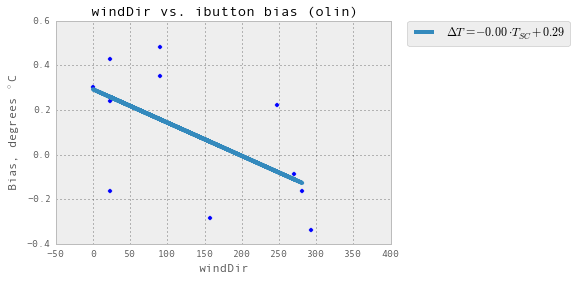

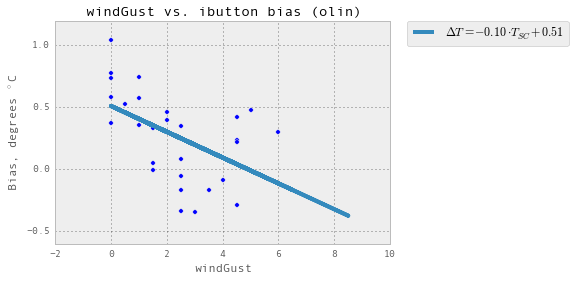

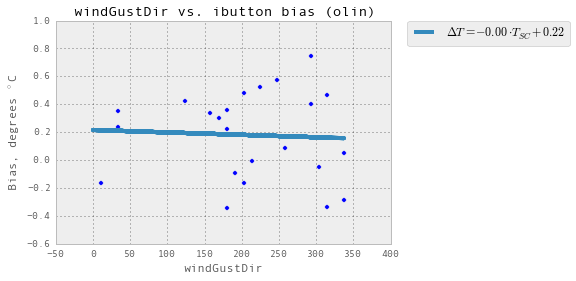

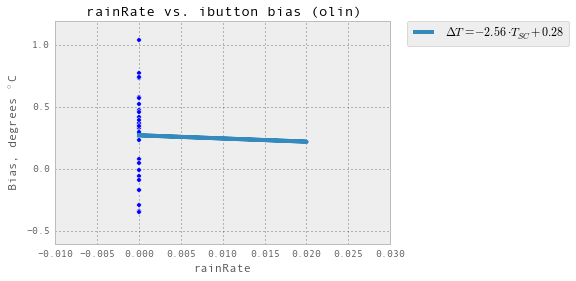

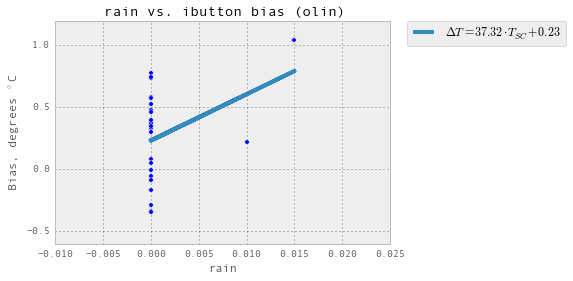

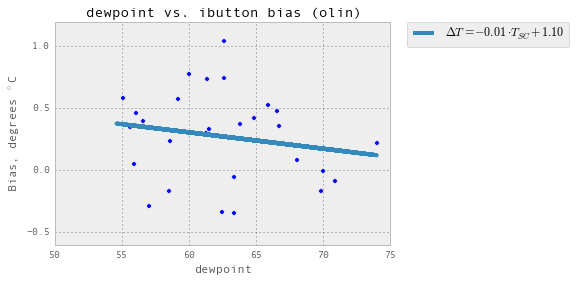

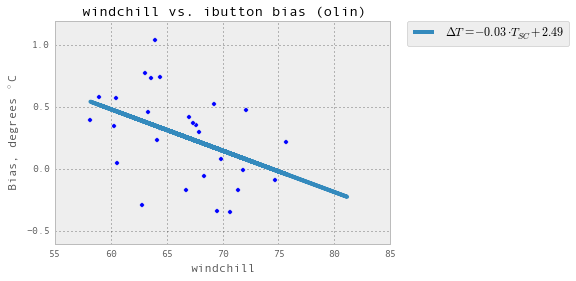

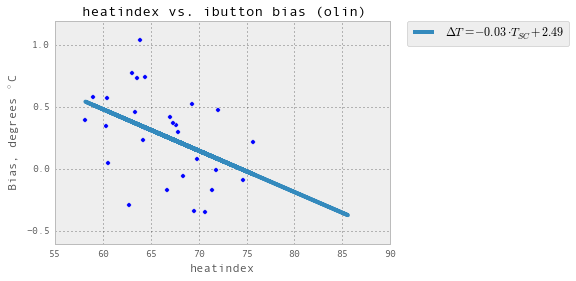

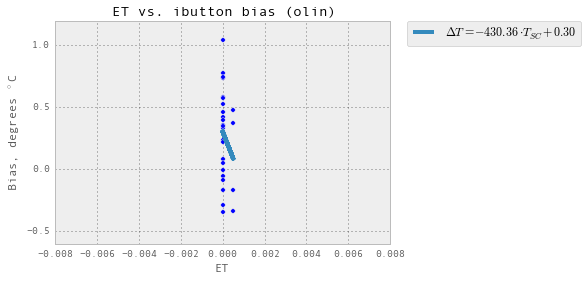

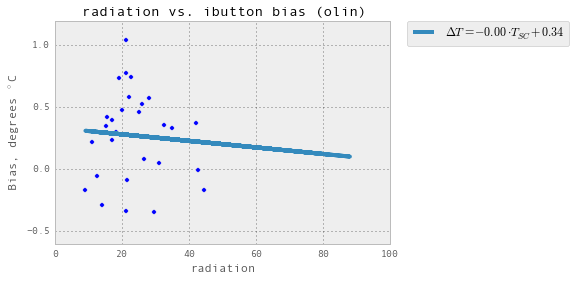

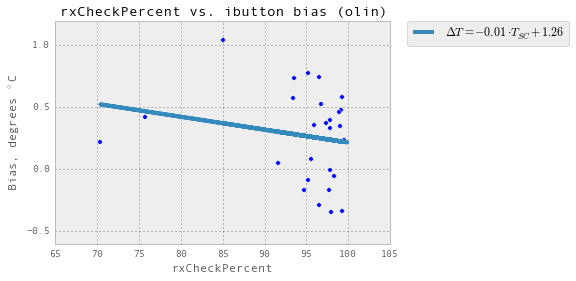

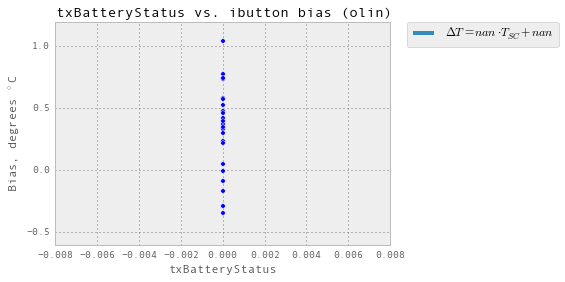

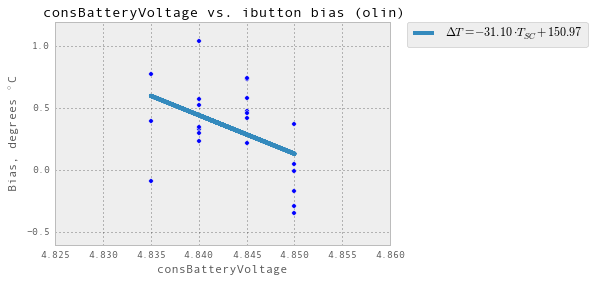

In [61]:
# olin hall bias versus weather station variables 
# Night
start = '2015-07-01'
end = '2015-08-30'
hour = 6
#buttons = [90, 49, 107, 86, 42, 53, 35, 96, 20] # Olin Hall parking lot: 96, 20, 42,  roof: 53, 86, 35 & 90 (tree over roof)
buttons = [90, 107, 86, 53, 35, 20] # Olin Hall


for variable in olinhalldf: 
    try: 
        x = olinhalldf[olinhalldf.index.hour==hour][variable][start:end]
        y = tempDF[tempDF.index.hour == hour][start:end][buttons].mean(axis=1)-olinhalldf[olinhalldf.index.hour==hour][start:end].outTemp
        index = ~np.isnan(x) & ~np.isnan(y)
        plt.scatter(x, y)
        m,b = np.polyfit(x[index],y[index],1)
        plt.plot(x, m*x+b,color = pd.tools.plotting._get_standard_colors(3)[0],
             lw =4,
             label = '$\Delta T=%.2f \cdot T_{SC}+%.2f$'%(m,b),
             )
        plt.ylabel('Bias, degrees $^\circ$C')
        plt.xlabel(variable)
        plt.title('Night %s vs. ibutton bias (olin)'%variable)
        lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol = 1)
        plt.show()
    except ValueError: 
        print 'skipping %s'%variable

/Users/ascott47/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:588: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


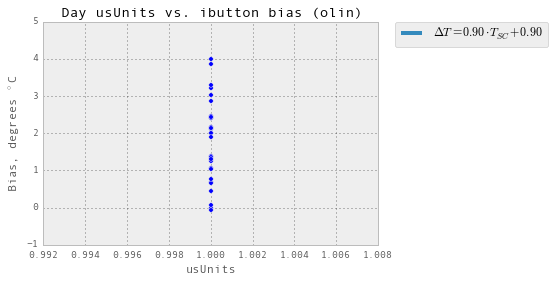

/Users/ascott47/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:588: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


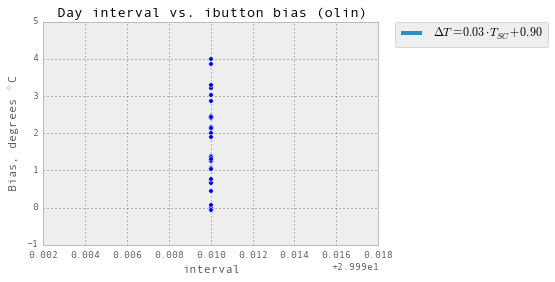

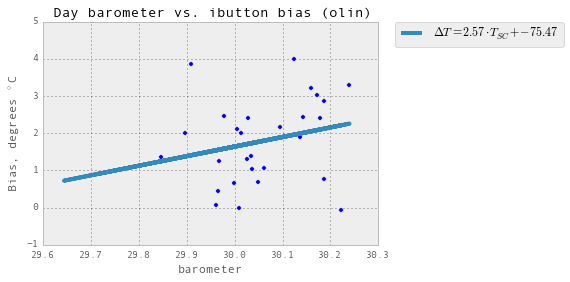

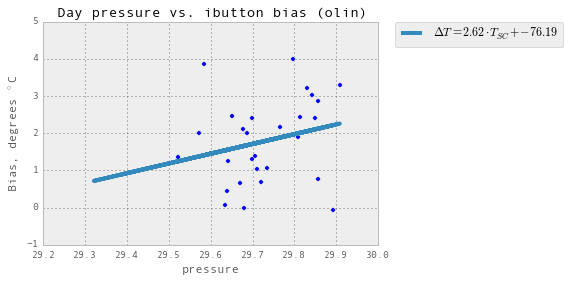

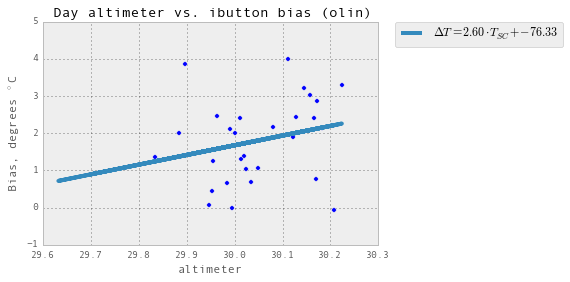

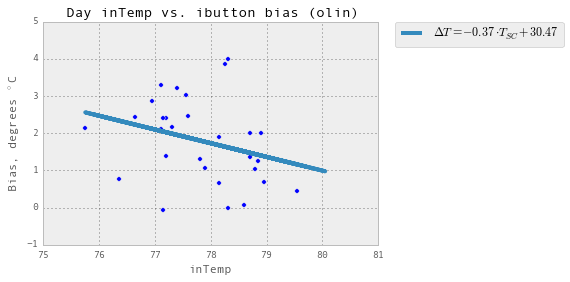

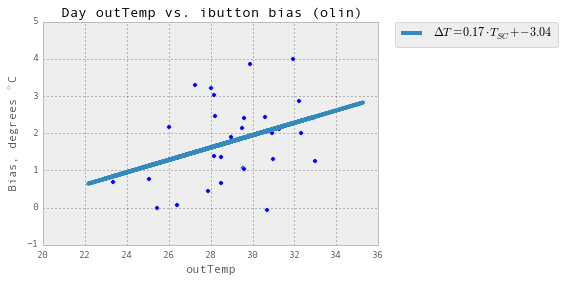

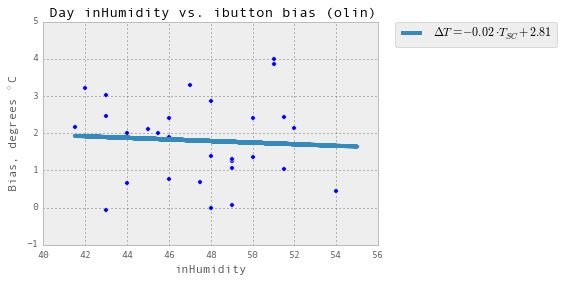

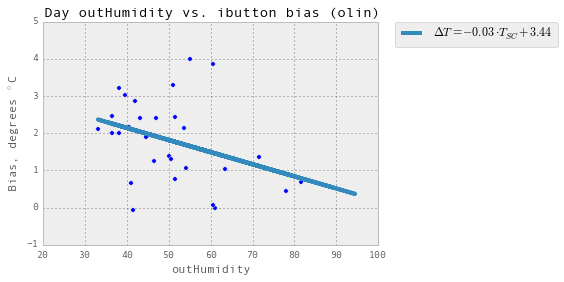

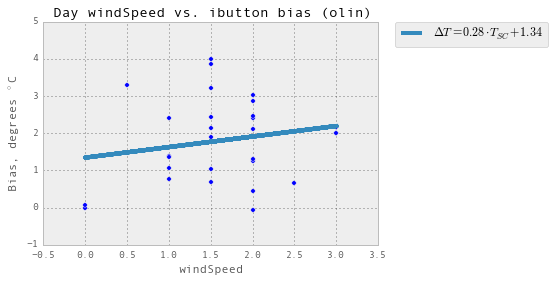

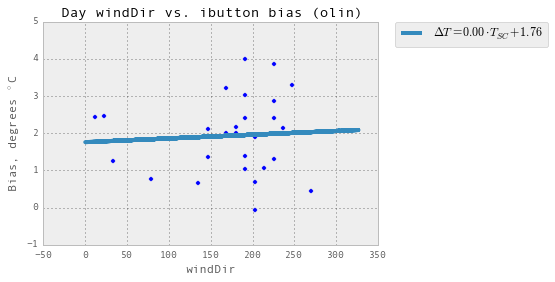

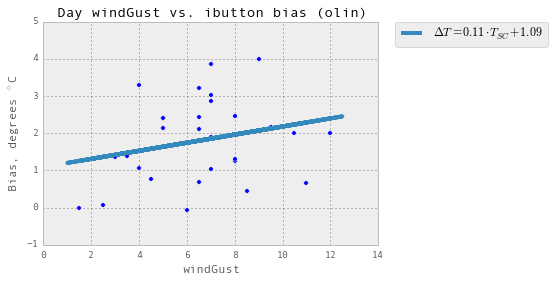

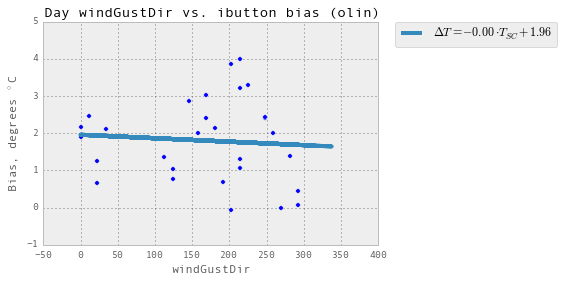

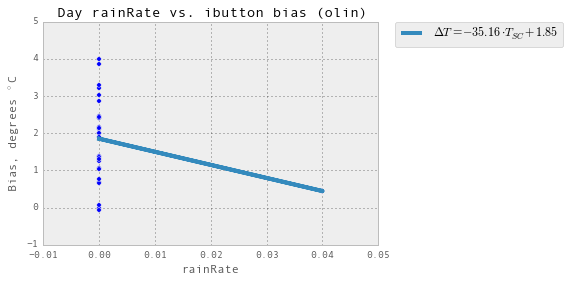

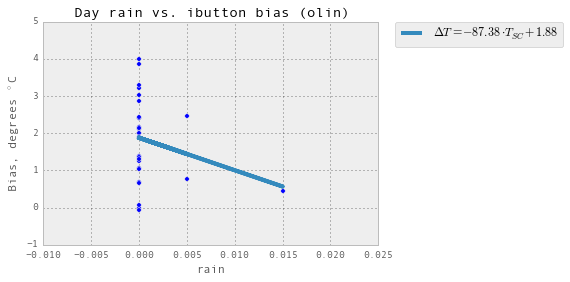

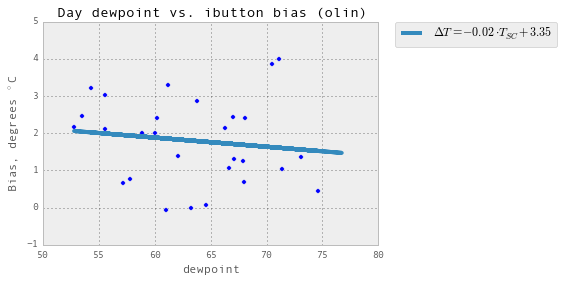

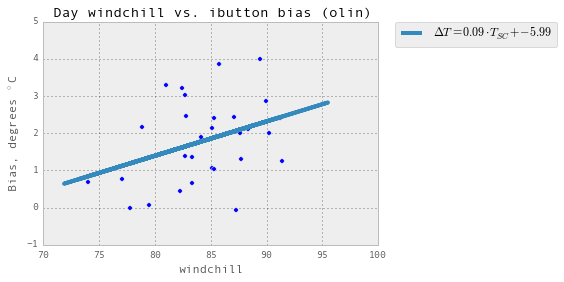

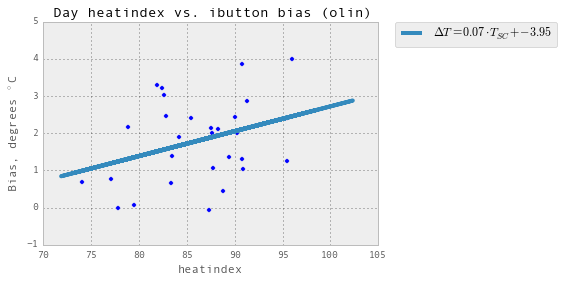

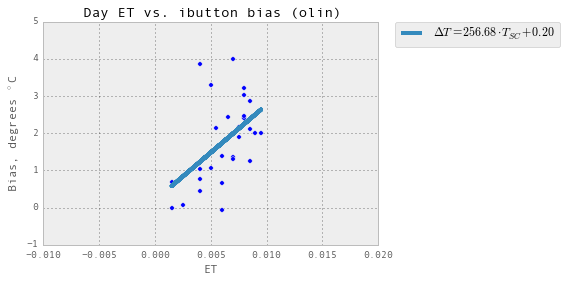

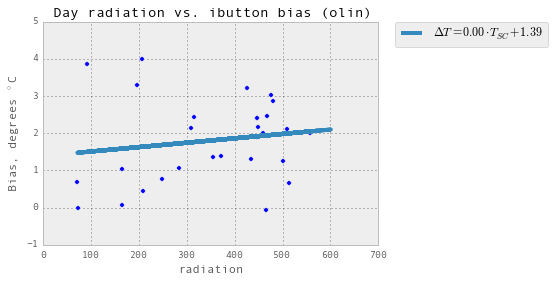

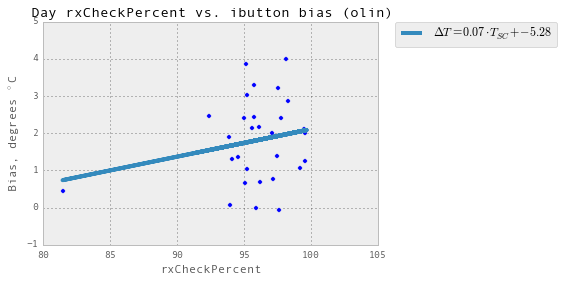

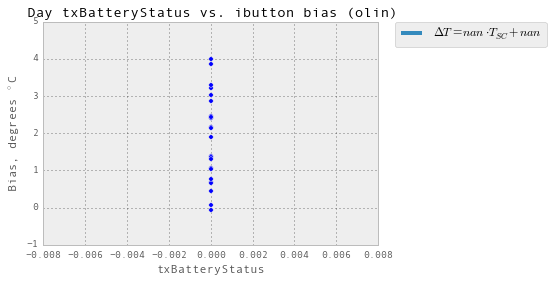

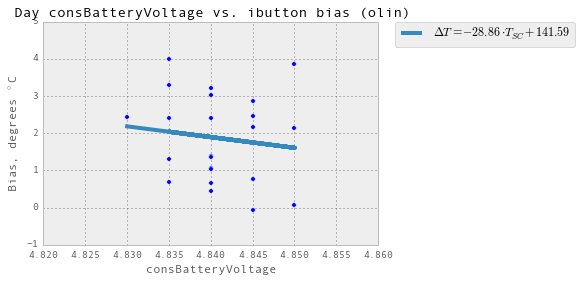

In [62]:
# olin hall bias versus weather station variables 
# Night
start = '2015-07-01'
end = '2015-08-30'
hour = 16
#buttons = [90, 49, 107, 86, 42, 53, 35, 96, 20] # Olin Hall parking lot: 96, 20, 42,  roof: 53, 86, 35 & 90 (tree over roof)
buttons = [90, 107, 86, 53, 35, 20] # Olin Hall


for variable in olinhalldf: 
    try: 
        x = olinhalldf[olinhalldf.index.hour==hour][variable][start:end]
        y = tempDF[tempDF.index.hour == hour][start:end][buttons].mean(axis=1)-olinhalldf[olinhalldf.index.hour==hour][start:end].outTemp
        index = ~np.isnan(x) & ~np.isnan(y)
        plt.scatter(x, y)
        m,b = np.polyfit(x[index],y[index],1)
        plt.plot(x, m*x+b,color = pd.tools.plotting._get_standard_colors(3)[0],
             lw =4,
             label = '$\Delta T=%.2f \cdot T_{SC}+%.2f$'%(m,b),
             )
        plt.ylabel('Bias, degrees $^\circ$C')
        plt.xlabel(variable)
        plt.title('Day %s vs. ibutton bias (olin)'%variable)
        lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol = 1)
        plt.show()
    except ValueError: 
        print 'skipping %s'%variable

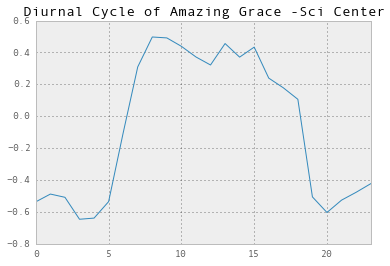

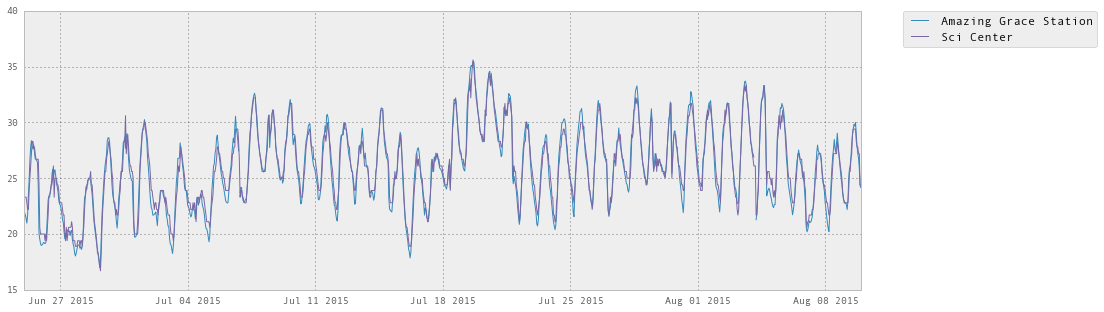

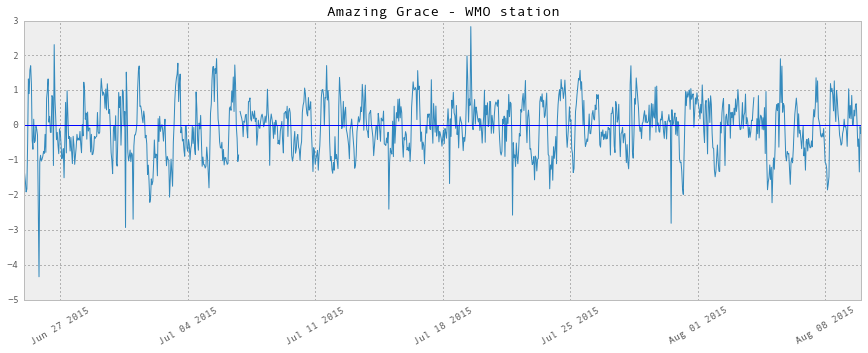

In [74]:
x = amazinggracedf['2015-06-25':'2015-08-09'].index
diff = amazinggracedf['2015-06-25':'2015-08-09'].outTemp-urbandf['2015-06-25':'2015-08-09'].TEMP
plt.title('Diurnal Cycle of Amazing Grace -Sci Center')
diff.groupby(diff.index.hour).mean().plot()

plt.figure(figsize=[15,5])
plt.plot(x, amazinggracedf['2015-06-25':'2015-08-09'].outTemp, label = 'Amazing Grace Station')
plt.plot(x, urbandf['2015-06-25':'2015-08-09'].TEMP, label = 'Sci Center')
lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol = 1)

plt.figure(figsize=[15,5])
plt.plot(x, 
         amazinggracedf['2015-06-25':'2015-08-09'].outTemp-urbandf['2015-06-25':'2015-08-09'].TEMP)
plt.xticks(rotation=30)
plt.axhline(0)
plt.title('Amazing Grace - WMO station')

/Users/ascott47/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:588: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


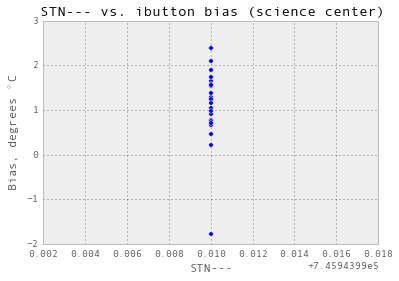

/Users/ascott47/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:588: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


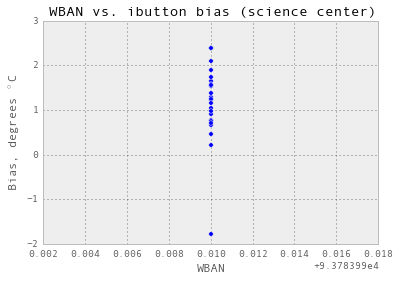

skipping YEAR
skipping MO
skipping DA


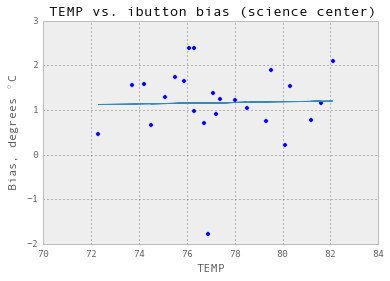

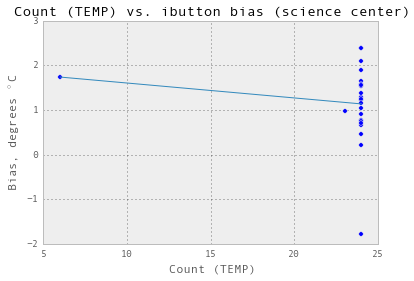

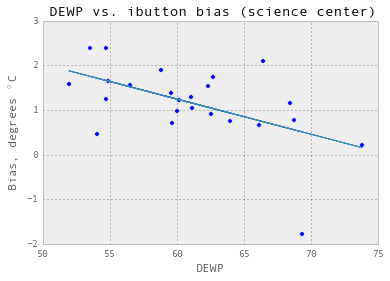

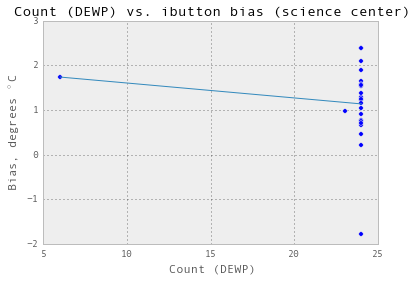

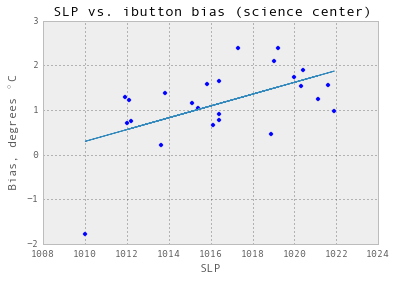

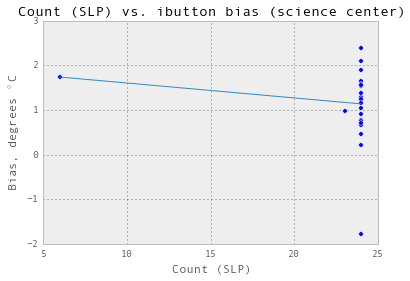

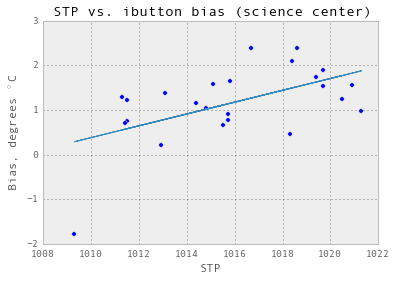

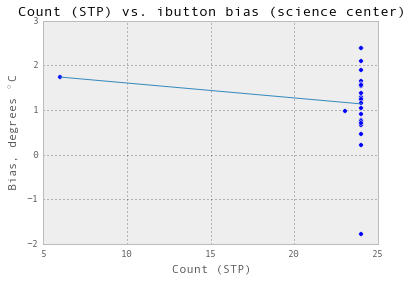

/Users/ascott47/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:588: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


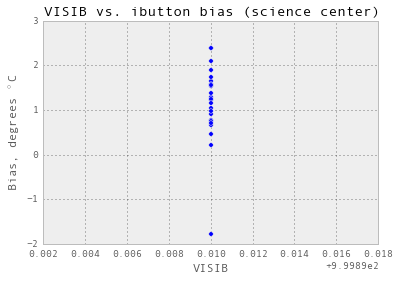

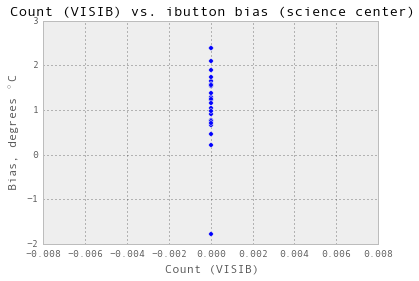

/Users/ascott47/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:588: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


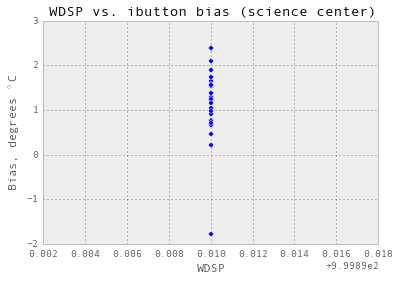

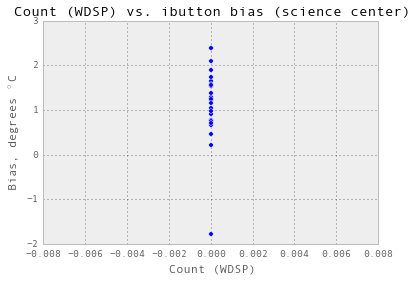

/Users/ascott47/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:588: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


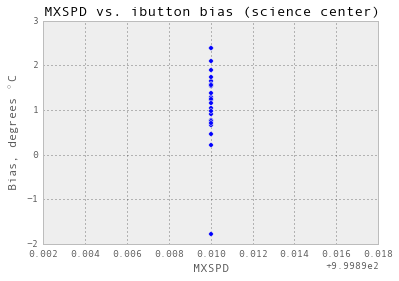

/Users/ascott47/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:588: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


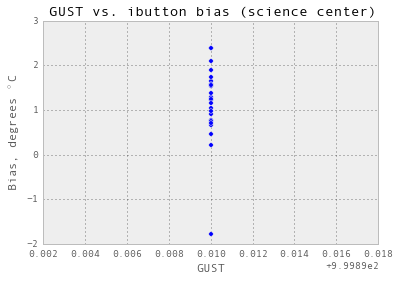

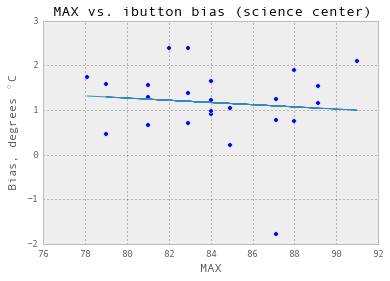

skipping Flag (MAX)


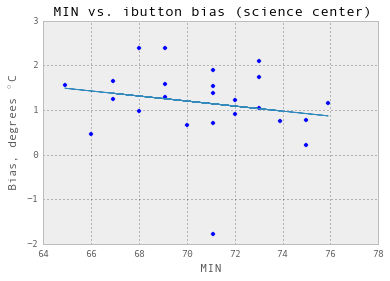

skipping Flag (MIN)


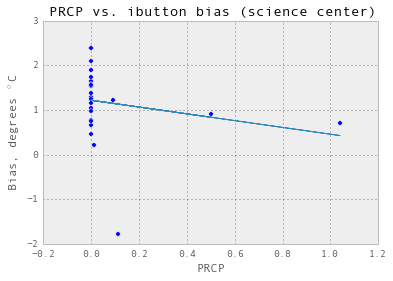

skipping Flag (PRCP)


/Users/ascott47/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:588: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


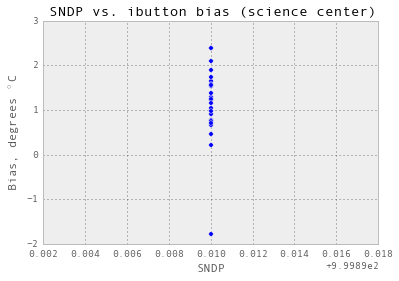

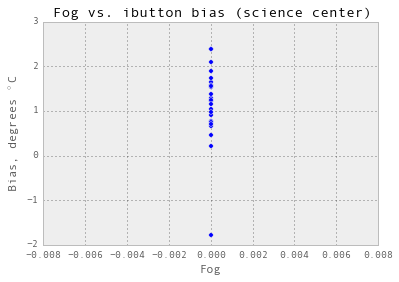

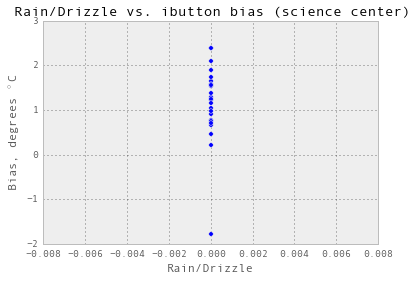

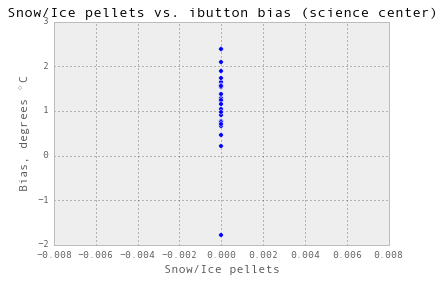

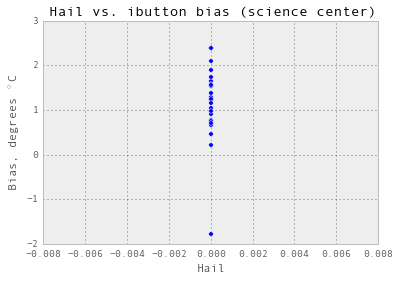

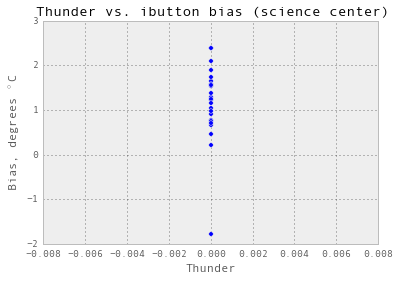

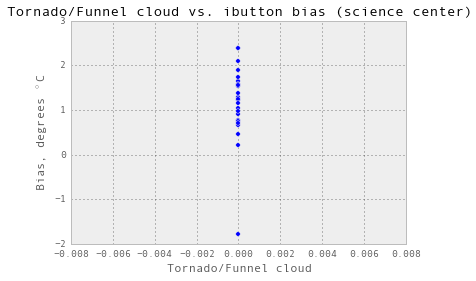

In [39]:
#Ibutton bias at science center at 
file = './data/observations/urban/2015.csv'
date_spec = {'Date': [2, 3, 4]}
dailyobs = pd.read_csv(file, sep = ',', parse_dates = date_spec, keep_date_col=True, index_col='Date')
start = '2015-08-07'
end = '2015-8-30'
hour = 16
bias = tempDF['2015-07-19':'2015-09-26'][108]-urbandf['2015-07-19':'2015-09-26'].TEMP
for variable in dailyobs: 
    try: 
        x = dailyobs[variable][start:end]
        y = bias[bias.index.hour==hour][start:end]
        plt.scatter(x, y)
        m,b = np.polyfit(x,y,1)
        plt.plot(x, m*x+b)
        plt.ylabel('Bias, degrees $^\circ$C')
        plt.xlabel(variable)
        plt.title('%s vs. ibutton bias (science center)'%variable)
        plt.show()
    except ValueError: 
        print 'skipping %s'%variable

In [ ]:
# Bias: a bot plot of Olin hall sensors
# For T_min 
fig = plt.figure()
startdate = '2015-08-3' 
enddate = '2015-10-01'
hour = 6
buttons = [90, 107, 86, 53, 35, 20]
(tempDF[tempDF.index.hour == hour][startdate:enddate][buttons] - olinhalldf[olinhalldf.index.hour ==hour][startdate:enddate].outTemp).boxplot()
plt.title('6 am Temperature at Olin Hall')
plt.xlabel('iButton number')
plt.ylabel('Temperature difference with Station')

# For T_max 
fig = plt.figure()
startdate = '2015-08-3' 
enddate = '2015-10-01'
hour = 16
buttons = [90, 107, 86, 53, 35, 20]
(tempDF[tempDF.index.hour == hour][startdate:enddate][buttons] - olinhalldf[olinhalldf.index.hour ==hour][startdate:enddate].outTemp).boxplot()
plt.title('4pm Temperature at Olin Hall')
plt.xlabel('iButton number')
plt.ylabel('Temperature difference with Station')

# For t_mean
fig = plt.figure()
startdate = '2015-08-3' 
enddate = '2015-10-01'
hour = 16
buttons = [90, 107, 86, 53, 35, 20]
(tempDF[startdate:enddate][buttons] - olinhalldf[startdate:enddate].outTemp).boxplot()
plt.title('Temperature at Olin Hall')
plt.xlabel('iButton number')
plt.ylabel('Temperature difference with Station')